## Introduction

in this kernel i will try to explore, clean and explain some features with statistical approaches and visualizations and also i'll see if i can do some feature engineering then i will try different algorithims for predicting who survived for this disaster 

if you have any suggest,advice or correction please don't hesitate to write it, i think it will be very helpful for me and if you like this kernel an upvote would be great.

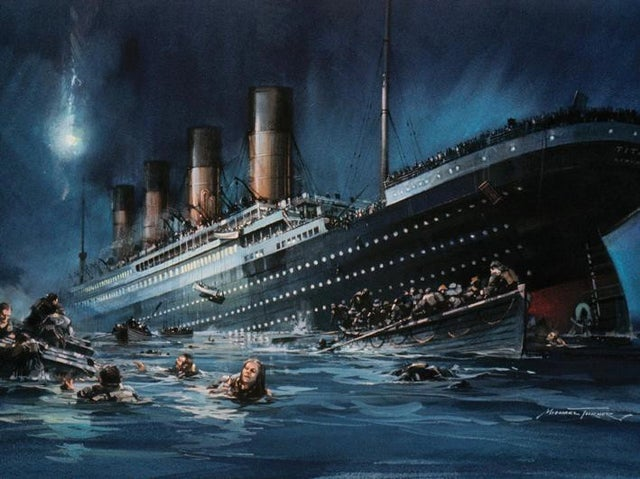

### Table of content
                1. data Exploration and cleaning
                2. Feature Engineering
                3. Applying different ML approaches



In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier


In [75]:
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')
test = pd.read_csv('../input/titanic/test.csv')
train = pd.read_csv('../input/titanic/train.csv')

#gender_submission.head()
#test.head()
#train.head()

## 1. data Exploration and cleaning

In [76]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
print(gender_submission.shape)
print(test.shape)
print(train.shape)

(418, 2)
(418, 11)
(891, 12)


In [78]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

(None, None)

In [79]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Pclass

these are the tickets for the 3 class, let's go and see the passengers distribution according to Pclass

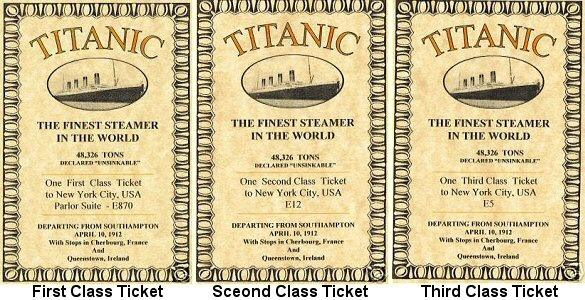

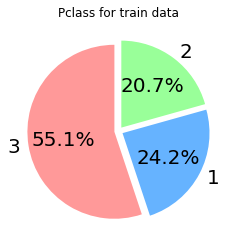

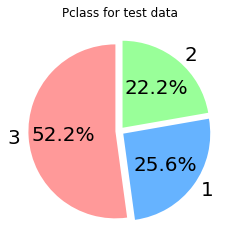

In [81]:
def pie_chart(df, column ,explode , labels,title,no):
    
    plt.pie(df[column].value_counts(),
            explode=explode,    #explode=[0.04,0]
            startangle=90, 
            autopct='%1.1f%%',
            labels=labels, #labels=['Males','Females']
            colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'],
            pctdistance=.6,
            textprops={'fontsize': 20})
    plt.title(title)
    plt.figure(no)

pie_chart(train, "Pclass" ,[0.05,0.05,0.05], ['3','1',"2"],"Pclass for train data",0)
pie_chart(test ,"Pclass" ,[0.05,0.05,0.05], ['3','1',"2"],"Pclass for test data",1)


### Sex

In [82]:
survived = train[train["Survived"] == 1]

Text(0.5, 1.0, 'number of males and females who survived')

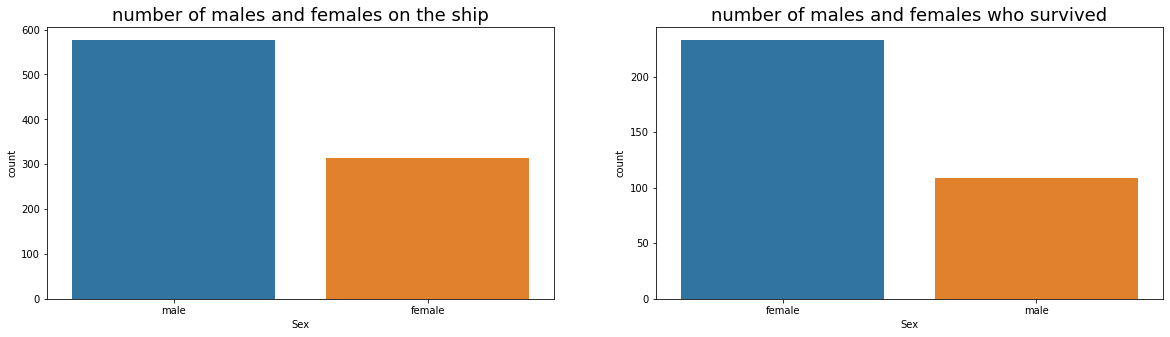

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[20, 5])

sns.countplot(train['Sex'], ax =axes[0]).set_title("number of males and females on the ship", fontsize=18)

sns.countplot(survived['Sex'], ax =axes[1]).set_title("number of males and females who survived", fontsize=18)

### Embarked

Text(0.5, 1.0, 'Test data Embarked distribution')

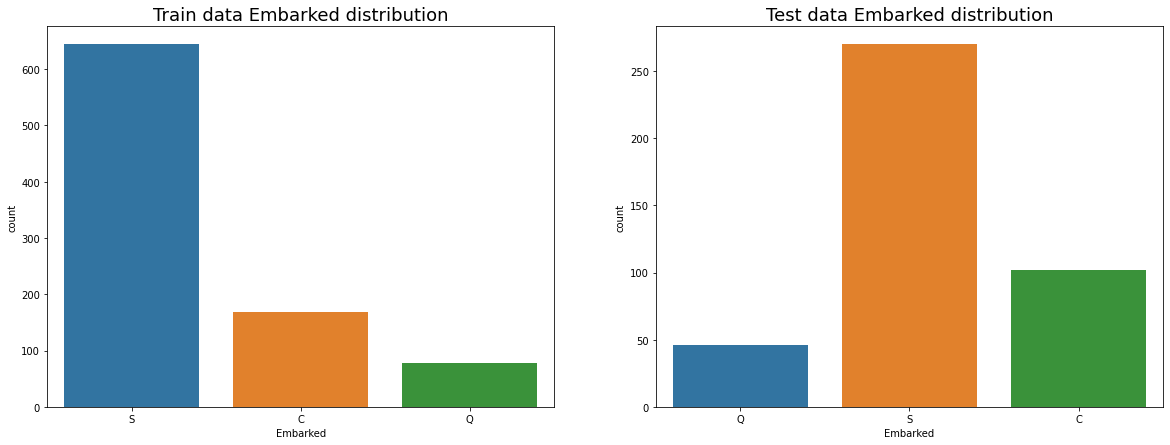

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[20, 7])

sns.countplot(train["Embarked"], ax =axes[0]).set_title("Train data Embarked distribution", fontsize=18)

sns.countplot(test["Embarked"], ax =axes[1]).set_title("Test data Embarked distribution", fontsize=18)


In [85]:
train["Embarked"].fillna("S", inplace = True)

### Age

passengers whom age is 0 are actully children which didn't complete their year one, shown in the next table

In [86]:
train[train["Age"] <2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [87]:
train_notnull_age = train[pd.notnull(train["Age"])]
test_notnull_age = test[pd.notnull(test["Age"])]
train_notnull_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Age distribution for test data')

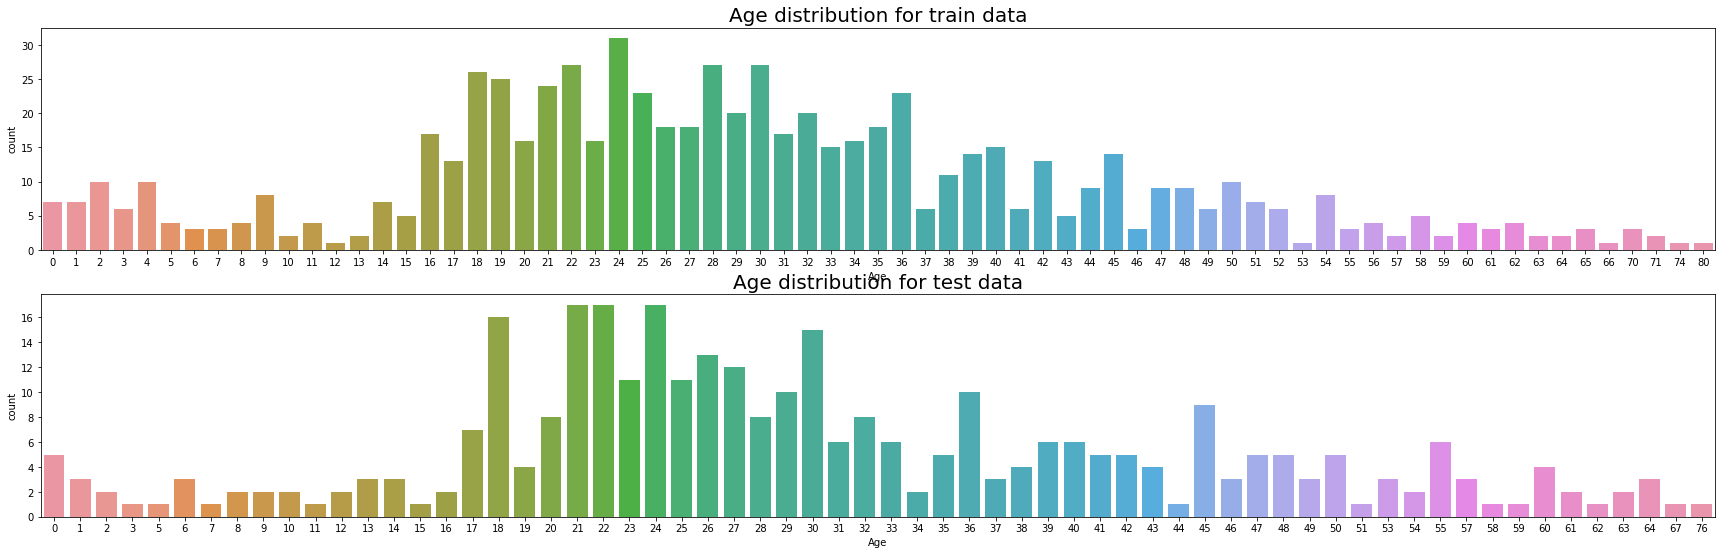

In [166]:
train_notnull_age["Age"] = train_notnull_age["Age"].astype(int)
test_notnull_age["Age"] = test_notnull_age["Age"].astype(int)


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[30, 9])

sns.countplot(train_notnull_age['Age'],ax =axes[0]).set_title("Age distribution for train data", fontsize=20)
sns.countplot(test_notnull_age['Age'],ax =axes[1]).set_title("Age distribution for test data", fontsize=20)

In [89]:
train["Age"].fillna(train["Age"].median(), inplace = True)
test["Age"].fillna(test["Age"].median(), inplace = True)

In [90]:
train["Age"] = train["Age"].astype(int)
test["Age"] = test["Age"].astype(int)


### Fare

In [91]:
test["Fare"].fillna(test["Fare"].median(), inplace = True)

In [92]:
train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [93]:
train[train["Fare"] < 4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,28,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,28,0,0,112052,0.0,NaN,S


there is no reasonable 0 fares for some passengers, will try to fill these 0s

In [94]:
fare = train[train["Fare"] > 4]
fare["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 876, dtype: float64

In [95]:
train.loc[ train.Fare == 0, "Fare" ] = fare["Fare"].median()


In [96]:
train[train["Fare"] < 4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [97]:
train.isnull().sum(), test.isnull().sum()


(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64)

### Cabin

In [98]:
train["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [99]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [100]:
train_without_cabin= train[train["Cabin"].isnull()]
train_with_cabin= train[train["Cabin"].notnull()]

test_without_cabin= test[test["Cabin"].isnull()]
test_with_cabin= test[test["Cabin"].notnull()]

In [101]:
train_without_cabin["Pclass"].value_counts(), train_with_cabin["Pclass"].value_counts()

(3    479
 2    168
 1     40
 Name: Pclass, dtype: int64,
 1    176
 2     16
 3     12
 Name: Pclass, dtype: int64)

Text(0.5, 1.0, 'Pclass without cabin for test data')

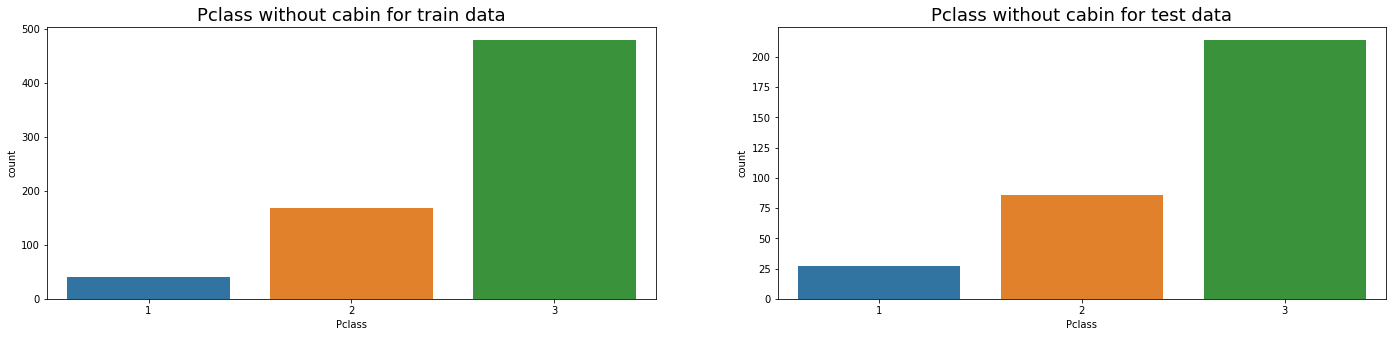

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[24, 5])

sns.countplot(train_without_cabin['Pclass'],ax =axes[0]).set_title("Pclass without cabin for train data", fontsize=18)
sns.countplot(test_without_cabin['Pclass'],ax =axes[1]).set_title("Pclass without cabin for test data", fontsize=18)


Text(0.5, 1.0, 'Pclass with cabin for test data')

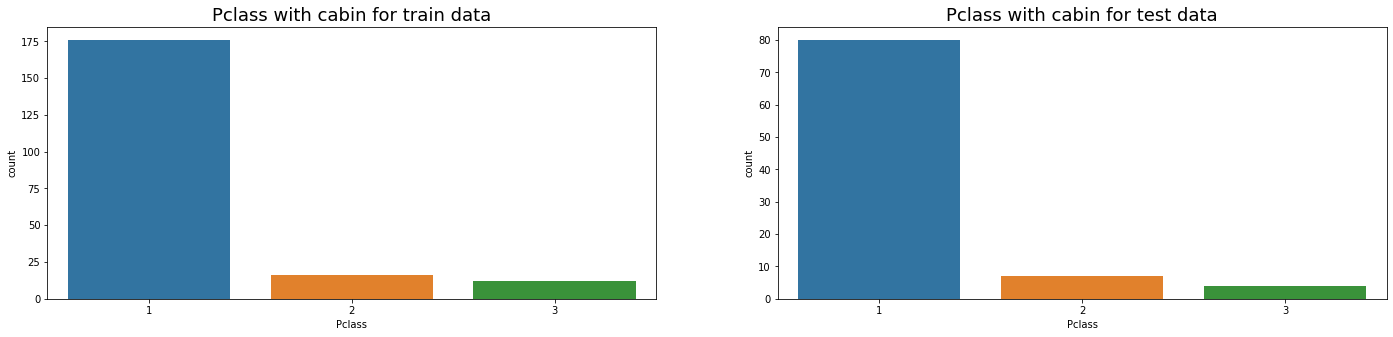

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[24, 5])

sns.countplot(train_with_cabin['Pclass'],ax =axes[0]).set_title("Pclass with cabin for train data", fontsize=18)
sns.countplot(test_with_cabin['Pclass'],ax =axes[1]).set_title("Pclass with cabin for test data", fontsize=18)


so, the most nan values in Cabin are related to Pclass 3

In [104]:
train_with_cabin[train_with_cabin["Pclass"] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,F G73,S
128,129,1,3,"Peter, Miss. Anna",female,28,1,1,2668,22.3583,F E69,C
205,206,0,3,"Strom, Miss. Telma Matilda",female,2,0,1,347054,10.4625,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29,1,1,347054,10.4625,G6,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24,0,2,PP 9549,16.7000,G6,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32,0,0,SOTON/O.Q. 392078,8.0500,E10,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42,0,0,348121,7.6500,F G63,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19,0,0,348124,7.6500,F G73,S
751,752,1,3,"Moor, Master. Meier",male,6,0,1,392096,12.4750,E121,S


In [105]:
train_with_cabin["Cabin"].unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [106]:
train["Cabin"].loc[ train["Cabin"].str.contains("C", na=False) ] = "C"
train["Cabin"].loc[ train["Cabin"].str.contains("E", na=False) ] = "E"
train["Cabin"].loc[ train["Cabin"].str.contains("A", na=False) ] = "A"
train["Cabin"].loc[ train["Cabin"].str.contains("B", na=False) ] = "B"
train["Cabin"].loc[ train["Cabin"].str.contains("G", na=False) ] = "G"
train["Cabin"].loc[ train["Cabin"].str.contains("F", na=False) ] = "F"
train["Cabin"].loc[ train["Cabin"].str.contains("D", na=False) ] = "D"
train["Cabin"].loc[ train["Cabin"].str.contains("B", na=False) ] = "B"

test["Cabin"].loc[ test["Cabin"].str.contains("C", na=False) ] = "C"
test["Cabin"].loc[ test["Cabin"].str.contains("E", na=False) ] = "E"
test["Cabin"].loc[ test["Cabin"].str.contains("A", na=False) ] = "A"
test["Cabin"].loc[ test["Cabin"].str.contains("B", na=False) ] = "B"
test["Cabin"].loc[ test["Cabin"].str.contains("G", na=False) ] = "G"
test["Cabin"].loc[ test["Cabin"].str.contains("F", na=False) ] = "F"
test["Cabin"].loc[ test["Cabin"].str.contains("D", na=False) ] = "D"
test["Cabin"].loc[ test["Cabin"].str.contains("B", na=False) ] = "B"


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [107]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [108]:
train["Cabin"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [109]:
train_with_cabin= train[train["Cabin"].notnull()]
train_with_cabin= train_with_cabin[train_with_cabin["Pclass"] == 3]

test_with_cabin= train[train["Cabin"].notnull()]
test_with_cabin= test_with_cabin[test_with_cabin["Pclass"] == 3]
test_with_cabin["Cabin"].unique(), train_with_cabin["Cabin"].unique()


(array(['G', 'E', 'F'], dtype=object), array(['G', 'E', 'F'], dtype=object))

In [110]:
train["Cabin"].fillna("G", inplace = True)
test["Cabin"].fillna("G", inplace = True)


In [111]:
train["Cabin"].value_counts(),test["Cabin"].value_counts()

(G    694
 C     59
 B     47
 E     33
 D     33
 A     15
 F      9
 T      1
 Name: Cabin, dtype: int64,
 G    329
 C     35
 B     18
 D     13
 E     11
 A      7
 F      5
 Name: Cabin, dtype: int64)

In [112]:
train["Cabin"].unique(), test["Cabin"].unique()

(array(['G', 'C', 'E', 'D', 'A', 'B', 'F', 'T'], dtype=object),
 array(['G', 'B', 'E', 'A', 'C', 'D', 'F'], dtype=object))

In [113]:
train.isnull().sum(), test.isnull().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 dtype: int64)

## let's check distribution of features and the correlation between them

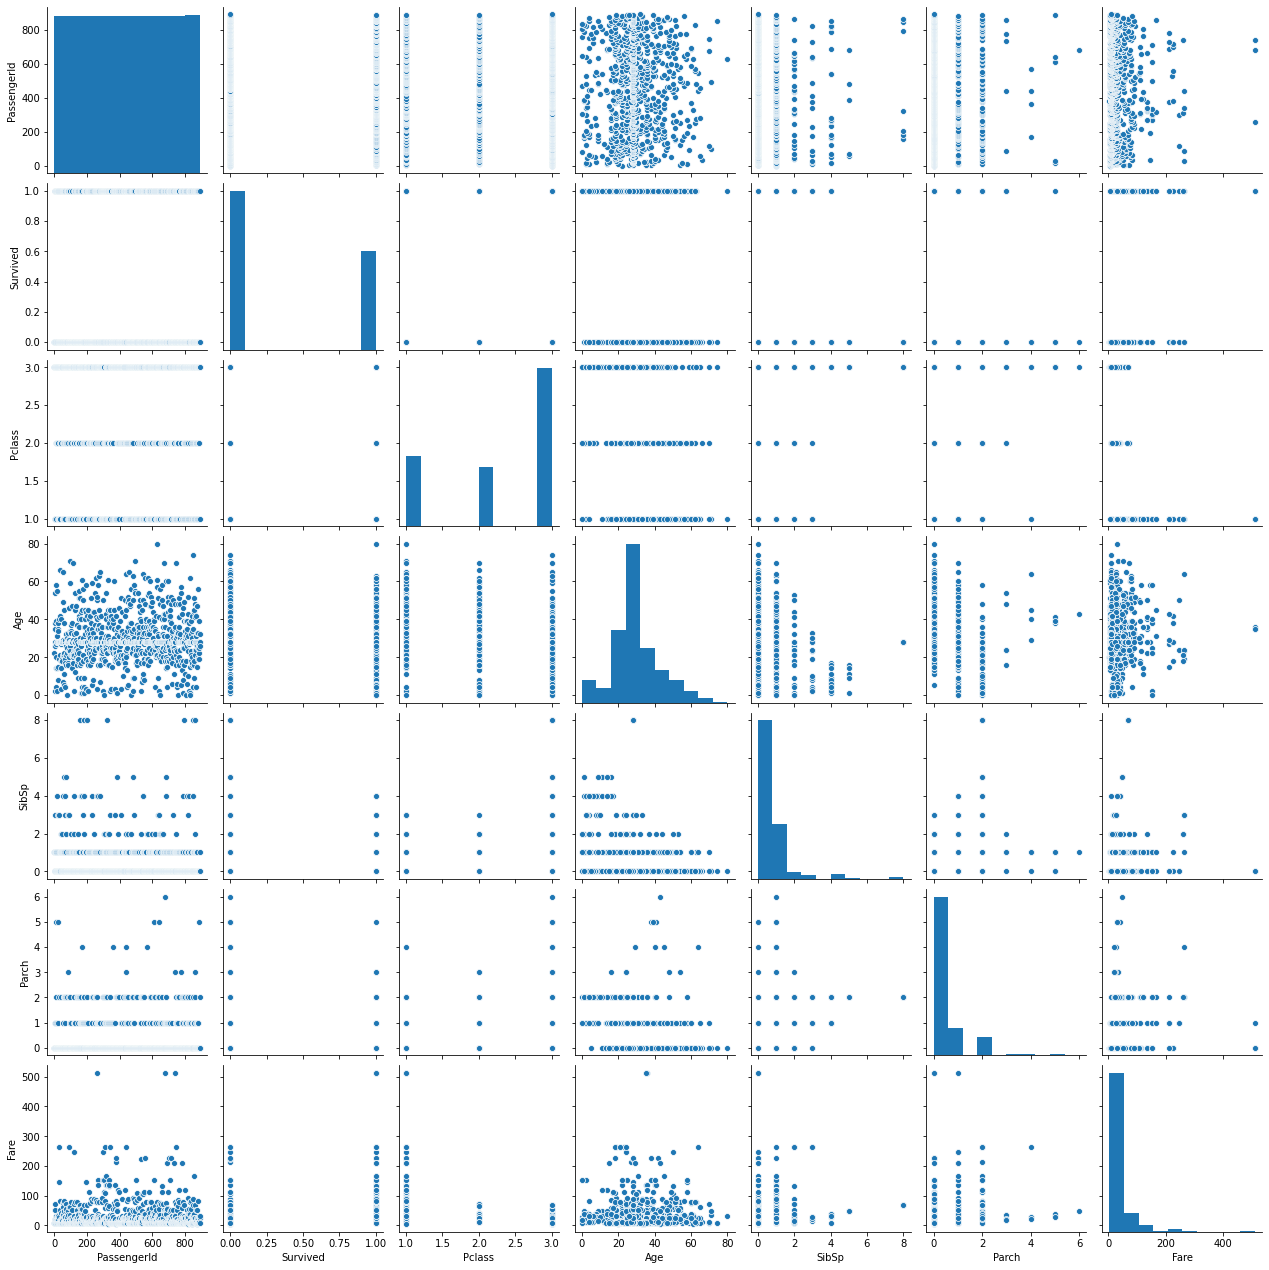

In [114]:
sns.pairplot(train, palette='deep')

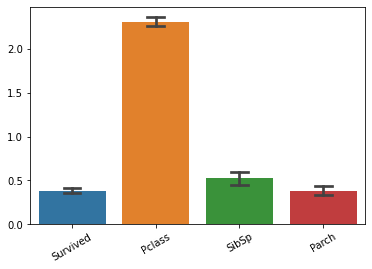

In [115]:
ax = sns.barplot(data=train.drop(["PassengerId","Age","Fare"],axis=1), capsize=.2)
plt.tick_params(axis='x', rotation=30)

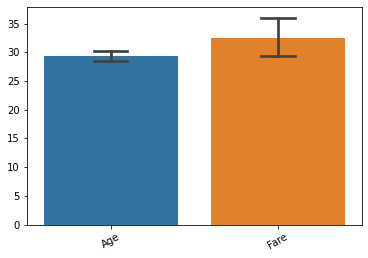

In [116]:
ax = sns.barplot(data=train[["Age","Fare"]], capsize=.2)
plt.tick_params(axis='x', rotation=30)

now let's go and see the correlation between features

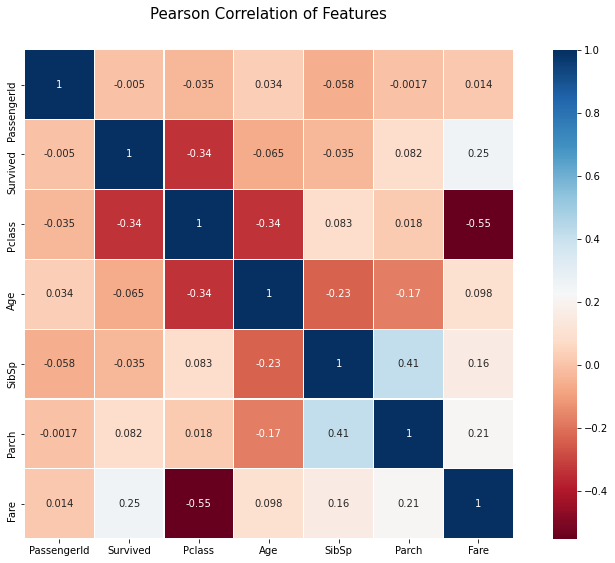

In [117]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,9))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [118]:
train.columns , test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

## 2. Feature Engineering

In [119]:
train["family"] = train["SibSp"] + train["Parch"]+1
train.drop(["Parch","SibSp"],axis=1,inplace=True)


test["family"] = test["SibSp"] + test["Parch"]+1
test.drop(["Parch","SibSp"],axis=1,inplace=True)


so after searching in **encyclopedia** i found that **name** feature has this pattern:

> surname ,martial status ,name (name for Mr and husbend name for Mrs) ,(name of Mrs) 

for example : 

> Futrelle, Mrs. Jacques Heath (Lily May Peel)	

In [120]:
train['Title'] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
train['Is_Married'] = 0
train['Is_Married'].loc[train['Title'] == 'Mrs'] = 1

test['Title'] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test['Is_Married'] = 0
test['Is_Married'].loc[test['Title'] == 'Mrs'] = 1

In [121]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

Text(0.5, 1.0, 'Is_Married feature distribution')

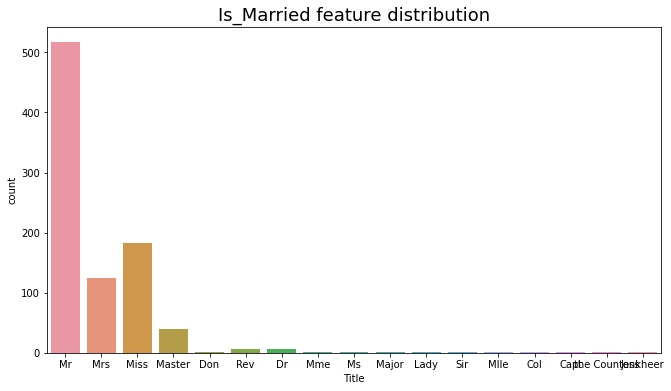

In [122]:
plt.rcParams['figure.figsize'] = (11, 6)

sns.countplot(train["Title"]).set_title("Is_Married feature distribution", fontsize=18)

In [123]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family,Title,Is_Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,G,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,C,2,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,G,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C,S,2,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,G,S,1,Mr,0


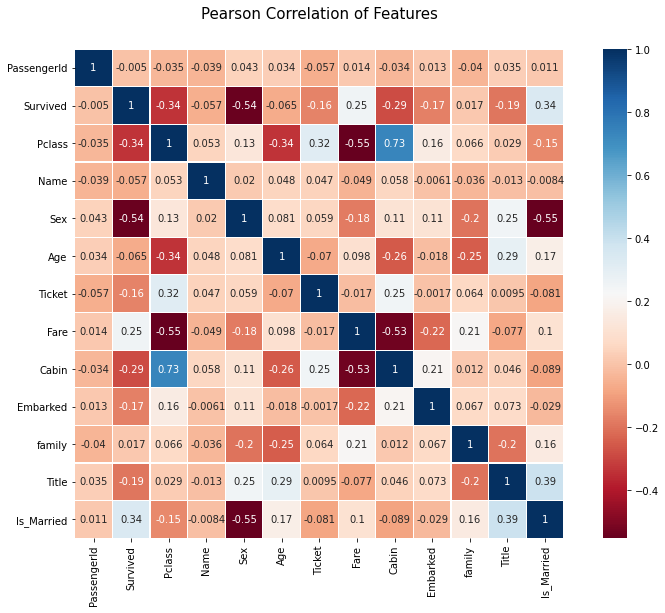

In [167]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,9))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## 3. Applying different ML approaches

In [124]:
#train = pd.get_dummies(train, columns=["Embarked","Sex"])
#test = pd.get_dummies(test, columns=["Embarked","Sex"])
#train.head()

In [125]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
train["Ticket"]=le.fit_transform(train["Ticket"])
train["Embarked"]=le.fit_transform(train["Embarked"])
train["Name"]=le.fit_transform(train["Name"])
train["Sex"]=le.fit_transform(train["Sex"])
train["Cabin"]=le.fit_transform(train["Cabin"])
train["Title"]=le.fit_transform(train["Title"])


test["Ticket"]=le.fit_transform(test["Ticket"])
test["Embarked"]=le.fit_transform(test["Embarked"])
test["Name"]=le.fit_transform(test["Name"])
test["Sex"]=le.fit_transform(test["Sex"])
test["Cabin"]=le.fit_transform(test["Cabin"])
test["Title"]=le.fit_transform(test["Title"])

#list(Name)
#le.inverse_transform([2])

In [126]:
#test['Sex'] = test['Sex'].apply(lambda x: 0 if x == "male" else 1)

#train['Sex'] = train['Sex'].apply(lambda x: 0 if x == "male" else 1)

In [127]:
X_train = train.drop(["Survived"], axis=1)
Y_train = train["Survived"]
X_test  = test.copy()
X_train.shape, Y_train.shape, X_test.shape
#Y_test = gender_submission["Survived"]

((891, 12), (891,), (418, 12))

In [128]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family,Title,Is_Married
0,1,3,108,1,22,523,7.2500,6,2,2,11,0
1,2,1,190,0,38,596,71.2833,2,0,2,12,1
2,3,3,353,0,26,669,7.9250,6,2,1,8,0
3,4,1,272,0,35,49,53.1000,2,2,2,12,1
4,5,3,15,1,35,472,8.0500,6,2,1,11,0


In [129]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family,Title,Is_Married
0,892,3,206,1,34,152,7.8292,6,1,1,5,0
1,893,3,403,0,47,221,7.0000,6,2,2,6,1
2,894,2,269,1,62,73,9.6875,6,1,1,5,0
3,895,3,408,1,27,147,8.6625,6,2,1,5,0
4,896,3,178,0,22,138,12.2875,6,2,3,6,1


In [130]:
#from sklearn.feature_selection import f_regression
#f_regression(X_train, Y_train, center=True)

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#y_train = scaler.fit_transform(y_train)
#y_test = scaler.fit_transform(y_test)
#scaler.transform(X_train)

In [132]:
#from sklearn.preprocessing import MaxAbsScaler
#MAscaler = MaxAbsScaler()
#X_train = MAscaler.fit_transform(X_train)
#X_test = MAscaler.fit_transform(X_test)

In [133]:
#from sklearn.preprocessing import MinMaxScaler
#MMscaler = MinMaxScaler(feature_range=(0,1))
#X_train = MMscaler.fit_transform(X_train)
#X_test = MMscaler.fit_transform(X_test)

In [134]:
#from sklearn.preprocessing import Normalizer
#normal = Normalizer(norm="l2")
#X_train = normal.fit_transform(X_train)
#X_test = normal.fit_transform(X_test)

In [135]:
scoring="accuracy"
k_fold = KFold(n_splits= 10 ,shuffle = True,random_state=0)

In [136]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear',max_iter=2000)
LR.fit(X_train,Y_train)


LR_acc = round(LR.score(X_train, Y_train) * 100, 2)
print(LR_acc)

LR_pred = LR.predict(X_test)

LR_CV = cross_val_score(LR, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(LR_CV)
print(LR_CV.mean())


81.14
[0.83333333 0.78651685 0.80898876 0.76404494 0.76404494 0.79775281
 0.78651685 0.83146067 0.82022472 0.86516854]
0.8058052434456929


In [137]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('classifier' , LogisticRegression())])

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

LR2 = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)


best_LR = LR2.fit(X_train, Y_train)

LR_acc = round(best_LR.score(X_train, Y_train) * 100, 2)
LR_acc

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


81.14

In [138]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,Y_train)

gnb_acc = round(gnb.score(X_train, Y_train) * 100, 2)
print(gnb_acc)

cv = cross_val_score(gnb,X_train,Y_train,cv=k_fold)
print(cv)
print(cv.mean())

76.43
[0.81111111 0.80898876 0.69662921 0.6741573  0.76404494 0.83146067
 0.75280899 0.75280899 0.76404494 0.74157303]
0.7597627965043696


In [139]:
svc = SVC()
svc.fit(X_train, Y_train)
SVC_pred = svc.predict(X_test)

acc_SVC = round(svc.score(X_train, Y_train) * 100, 2)
print(acc_SVC)


SVC_CV = cross_val_score(svc, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring).mean()
print(SVC_CV)


85.63
0.8260299625468164


In [140]:
param_grid = [
    {'kernel' : ['linear', 'rbf', 'poly']}]
    #'gamma' : [0.1, 1, 10, 100]
    #'C' : [0.1, 1, 10, 100, 1000],
    #'degree' : [0, 1, 2, 3, 4, 5, 6]}]

svc2 = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)


best_svc2 = svc2.fit(X_train, Y_train)

svc2_acc = round(best_svc2.score(X_train, Y_train) * 100, 2)
svc2_acc

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished


85.63

In [141]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
KNN_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

print(acc_knn)

KNN_CV = cross_val_score(knn, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring).mean()
print(KNN_CV)


88.78
0.8091760299625468


In [142]:
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}

Knn2 = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)


best_Knn2 = Knn2.fit(X_train, Y_train)

Knn2_acc = round(best_Knn2.score(X_train, Y_train) * 100, 2)
Knn2_acc

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.0s finished


100.0

In [143]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
rand_forrest_pred = random_forest.predict(X_test)


acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

random_forest_CV = cross_val_score(random_forest, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring).mean()
print(random_forest_CV)


100.0
0.8338826466916356


In [144]:
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

random_forest2 = GridSearchCV(random_forest, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)


best_random_forest2 = random_forest2.fit(X_train, Y_train)

random_forest2_acc = round(best_random_forest2.score(X_train, Y_train) * 100, 2)
random_forest2_acc

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 13.0min finished


98.32

In [145]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,Y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  4.1min finished


In [146]:
xgb_acc = round(best_clf_xgb.score(X_train, Y_train) * 100, 2)
xgb_acc

91.02

In [147]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

Using TensorFlow backend.


In [148]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

#Layers
#Input Layer
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
#Hidden Layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))


#Ouput Layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#Binary cross_entropy is for classification loss function.
model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model
model.fit(X_train, Y_train, batch_size = 32, epochs = 6000, verbose=2, callbacks=[es])

Epoch 1/6000
 - 1s - loss: 0.6915 - accuracy: 0.6162
Epoch 2/6000
 - 0s - loss: 0.6885 - accuracy: 0.6162
Epoch 3/6000
 - 0s - loss: 0.6841 - accuracy: 0.6162
Epoch 4/6000


/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 0s - loss: 0.6751 - accuracy: 0.6162
Epoch 5/6000
 - 0s - loss: 0.6531 - accuracy: 0.6162
Epoch 6/6000
 - 0s - loss: 0.6083 - accuracy: 0.6162
Epoch 7/6000
 - 0s - loss: 0.5479 - accuracy: 0.6891
Epoch 8/6000
 - 0s - loss: 0.5049 - accuracy: 0.8171
Epoch 9/6000
 - 0s - loss: 0.4835 - accuracy: 0.8204
Epoch 10/6000
 - 0s - loss: 0.4619 - accuracy: 0.8137
Epoch 11/6000
 - 0s - loss: 0.4447 - accuracy: 0.8159
Epoch 12/6000
 - 0s - loss: 0.4337 - accuracy: 0.8171
Epoch 13/6000
 - 0s - loss: 0.4285 - accuracy: 0.8171
Epoch 14/6000
 - 0s - loss: 0.4253 - accuracy: 0.8148
Epoch 15/6000
 - 0s - loss: 0.4213 - accuracy: 0.8283
Epoch 16/6000
 - 0s - loss: 0.4195 - accuracy: 0.8272
Epoch 17/6000
 - 0s - loss: 0.4177 - accuracy: 0.8294
Epoch 18/6000
 - 0s - loss: 0.4162 - accuracy: 0.8294
Epoch 19/6000
 - 0s - loss: 0.4156 - accuracy: 0.8294
Epoch 20/6000
 - 0s - loss: 0.4142 - accuracy: 0.8272
Epoch 21/6000
 - 0s - loss: 0.4116 - accuracy: 0.8260
Epoch 22/6000
 - 0s - loss: 0.4108 - accuracy: 

 - 0s - loss: 0.3520 - accuracy: 0.8676
Epoch 156/6000
 - 0s - loss: 0.3533 - accuracy: 0.8642
Epoch 157/6000
 - 0s - loss: 0.3517 - accuracy: 0.8754
Epoch 158/6000
 - 0s - loss: 0.3522 - accuracy: 0.8721
Epoch 159/6000
 - 0s - loss: 0.3525 - accuracy: 0.8698
Epoch 160/6000
 - 0s - loss: 0.3525 - accuracy: 0.8698
Epoch 161/6000
 - 0s - loss: 0.3527 - accuracy: 0.8676
Epoch 162/6000
 - 0s - loss: 0.3524 - accuracy: 0.8653
Epoch 163/6000
 - 0s - loss: 0.3520 - accuracy: 0.8698
Epoch 164/6000
 - 0s - loss: 0.3505 - accuracy: 0.8721
Epoch 165/6000
 - 0s - loss: 0.3518 - accuracy: 0.8743
Epoch 166/6000
 - 0s - loss: 0.3528 - accuracy: 0.8698
Epoch 167/6000
 - 0s - loss: 0.3520 - accuracy: 0.8698
Epoch 168/6000
 - 0s - loss: 0.3491 - accuracy: 0.8754
Epoch 169/6000
 - 0s - loss: 0.3512 - accuracy: 0.8698
Epoch 170/6000
 - 0s - loss: 0.3502 - accuracy: 0.8676
Epoch 171/6000
 - 0s - loss: 0.3491 - accuracy: 0.8732
Epoch 172/6000
 - 0s - loss: 0.3505 - accuracy: 0.8754
Epoch 173/6000
 - 0s - lo

 - 0s - loss: 0.3228 - accuracy: 0.8878
Epoch 305/6000
 - 0s - loss: 0.3238 - accuracy: 0.8833
Epoch 306/6000
 - 0s - loss: 0.3248 - accuracy: 0.8788
Epoch 307/6000
 - 0s - loss: 0.3235 - accuracy: 0.8799
Epoch 308/6000
 - 0s - loss: 0.3233 - accuracy: 0.8866
Epoch 309/6000
 - 0s - loss: 0.3217 - accuracy: 0.8822
Epoch 310/6000
 - 0s - loss: 0.3240 - accuracy: 0.8855
Epoch 311/6000
 - 0s - loss: 0.3253 - accuracy: 0.8799
Epoch 312/6000
 - 0s - loss: 0.3211 - accuracy: 0.8833
Epoch 313/6000
 - 0s - loss: 0.3209 - accuracy: 0.8855
Epoch 314/6000
 - 0s - loss: 0.3231 - accuracy: 0.8855
Epoch 315/6000
 - 0s - loss: 0.3199 - accuracy: 0.8855
Epoch 316/6000
 - 0s - loss: 0.3231 - accuracy: 0.8799
Epoch 317/6000
 - 0s - loss: 0.3194 - accuracy: 0.8889
Epoch 318/6000
 - 0s - loss: 0.3190 - accuracy: 0.8889
Epoch 319/6000
 - 0s - loss: 0.3218 - accuracy: 0.8822
Epoch 320/6000
 - 0s - loss: 0.3189 - accuracy: 0.8889
Epoch 321/6000
 - 0s - loss: 0.3190 - accuracy: 0.8866
Epoch 322/6000
 - 0s - lo

 - 0s - loss: 0.2990 - accuracy: 0.8911
Epoch 454/6000
 - 0s - loss: 0.3004 - accuracy: 0.8889
Epoch 455/6000
 - 0s - loss: 0.3032 - accuracy: 0.8889
Epoch 456/6000
 - 0s - loss: 0.3069 - accuracy: 0.8889
Epoch 457/6000
 - 0s - loss: 0.2983 - accuracy: 0.8866
Epoch 458/6000
 - 0s - loss: 0.2981 - accuracy: 0.8911
Epoch 459/6000
 - 0s - loss: 0.3024 - accuracy: 0.8878
Epoch 460/6000
 - 0s - loss: 0.3010 - accuracy: 0.8923
Epoch 461/6000
 - 0s - loss: 0.2997 - accuracy: 0.8889
Epoch 462/6000
 - 0s - loss: 0.2980 - accuracy: 0.8900
Epoch 463/6000
 - 0s - loss: 0.2972 - accuracy: 0.8889
Epoch 464/6000
 - 0s - loss: 0.2988 - accuracy: 0.8923
Epoch 465/6000
 - 0s - loss: 0.3087 - accuracy: 0.8855
Epoch 466/6000
 - 0s - loss: 0.2998 - accuracy: 0.8889
Epoch 467/6000
 - 0s - loss: 0.2982 - accuracy: 0.8900
Epoch 468/6000
 - 0s - loss: 0.3017 - accuracy: 0.8855
Epoch 469/6000
 - 0s - loss: 0.3000 - accuracy: 0.8900
Epoch 470/6000
 - 0s - loss: 0.2999 - accuracy: 0.8900
Epoch 471/6000
 - 0s - lo

 - 0s - loss: 0.2848 - accuracy: 0.8979
Epoch 603/6000
 - 0s - loss: 0.2858 - accuracy: 0.8945
Epoch 604/6000
 - 0s - loss: 0.2833 - accuracy: 0.8934
Epoch 605/6000
 - 0s - loss: 0.2837 - accuracy: 0.8934
Epoch 606/6000
 - 0s - loss: 0.2867 - accuracy: 0.8979
Epoch 607/6000
 - 0s - loss: 0.2844 - accuracy: 0.8956
Epoch 608/6000
 - 0s - loss: 0.2814 - accuracy: 0.8956
Epoch 609/6000
 - 0s - loss: 0.2832 - accuracy: 0.8956
Epoch 610/6000
 - 0s - loss: 0.2845 - accuracy: 0.8990
Epoch 611/6000
 - 0s - loss: 0.2844 - accuracy: 0.8990
Epoch 612/6000
 - 0s - loss: 0.2826 - accuracy: 0.8967
Epoch 613/6000
 - 0s - loss: 0.2848 - accuracy: 0.8967
Epoch 614/6000
 - 0s - loss: 0.2840 - accuracy: 0.8967
Epoch 615/6000
 - 0s - loss: 0.2826 - accuracy: 0.8956
Epoch 616/6000
 - 0s - loss: 0.2824 - accuracy: 0.8956
Epoch 617/6000
 - 0s - loss: 0.2826 - accuracy: 0.8934
Epoch 618/6000
 - 0s - loss: 0.2843 - accuracy: 0.8979
Epoch 619/6000
 - 0s - loss: 0.2881 - accuracy: 0.8945
Epoch 620/6000
 - 0s - lo

 - 0s - loss: 0.2688 - accuracy: 0.9057
Epoch 752/6000
 - 0s - loss: 0.2694 - accuracy: 0.9068
Epoch 753/6000
 - 0s - loss: 0.2675 - accuracy: 0.9057
Epoch 754/6000
 - 0s - loss: 0.2715 - accuracy: 0.9012
Epoch 755/6000
 - 0s - loss: 0.2709 - accuracy: 0.9068
Epoch 756/6000
 - 0s - loss: 0.2700 - accuracy: 0.9102
Epoch 757/6000
 - 0s - loss: 0.2761 - accuracy: 0.9035
Epoch 758/6000
 - 0s - loss: 0.2683 - accuracy: 0.9057
Epoch 759/6000
 - 0s - loss: 0.2686 - accuracy: 0.9046
Epoch 760/6000
 - 0s - loss: 0.2686 - accuracy: 0.9046
Epoch 761/6000
 - 0s - loss: 0.2676 - accuracy: 0.9046
Epoch 762/6000
 - 0s - loss: 0.2695 - accuracy: 0.9057
Epoch 763/6000
 - 0s - loss: 0.2722 - accuracy: 0.9012
Epoch 764/6000
 - 0s - loss: 0.2699 - accuracy: 0.9046
Epoch 765/6000
 - 0s - loss: 0.2704 - accuracy: 0.9001
Epoch 766/6000
 - 0s - loss: 0.2728 - accuracy: 0.9012
Epoch 767/6000
 - 0s - loss: 0.2732 - accuracy: 0.9024
Epoch 768/6000
 - 0s - loss: 0.2694 - accuracy: 0.9057
Epoch 769/6000
 - 0s - lo

 - 0s - loss: 0.2570 - accuracy: 0.9125
Epoch 901/6000
 - 0s - loss: 0.2555 - accuracy: 0.9102
Epoch 902/6000
 - 0s - loss: 0.2543 - accuracy: 0.9125
Epoch 903/6000
 - 0s - loss: 0.2577 - accuracy: 0.9091
Epoch 904/6000
 - 0s - loss: 0.2783 - accuracy: 0.9035
Epoch 905/6000
 - 0s - loss: 0.2657 - accuracy: 0.9024
Epoch 906/6000
 - 0s - loss: 0.2620 - accuracy: 0.9068
Epoch 907/6000
 - 0s - loss: 0.2537 - accuracy: 0.9136
Epoch 908/6000
 - 0s - loss: 0.2668 - accuracy: 0.9068
Epoch 909/6000
 - 0s - loss: 0.2600 - accuracy: 0.9068
Epoch 910/6000
 - 0s - loss: 0.2547 - accuracy: 0.9091
Epoch 911/6000
 - 0s - loss: 0.2580 - accuracy: 0.9113
Epoch 912/6000
 - 0s - loss: 0.2583 - accuracy: 0.9068
Epoch 913/6000
 - 0s - loss: 0.2545 - accuracy: 0.9125
Epoch 914/6000
 - 0s - loss: 0.2555 - accuracy: 0.9102
Epoch 915/6000
 - 0s - loss: 0.2547 - accuracy: 0.9091
Epoch 916/6000
 - 0s - loss: 0.2576 - accuracy: 0.9057
Epoch 917/6000
 - 0s - loss: 0.2585 - accuracy: 0.9091
Epoch 918/6000
 - 0s - lo

Epoch 1049/6000
 - 0s - loss: 0.2579 - accuracy: 0.9068
Epoch 1050/6000
 - 0s - loss: 0.2600 - accuracy: 0.9046
Epoch 1051/6000
 - 0s - loss: 0.2550 - accuracy: 0.9091
Epoch 1052/6000
 - 0s - loss: 0.2551 - accuracy: 0.9057
Epoch 1053/6000
 - 0s - loss: 0.2463 - accuracy: 0.9102
Epoch 1054/6000
 - 0s - loss: 0.2450 - accuracy: 0.9125
Epoch 1055/6000
 - 0s - loss: 0.2448 - accuracy: 0.9113
Epoch 1056/6000
 - 0s - loss: 0.2546 - accuracy: 0.9102
Epoch 1057/6000
 - 0s - loss: 0.2453 - accuracy: 0.9158
Epoch 1058/6000
 - 0s - loss: 0.2486 - accuracy: 0.9125
Epoch 1059/6000
 - 0s - loss: 0.2461 - accuracy: 0.9113
Epoch 1060/6000
 - 0s - loss: 0.2528 - accuracy: 0.9091
Epoch 1061/6000
 - 0s - loss: 0.2497 - accuracy: 0.9113
Epoch 1062/6000
 - 0s - loss: 0.2454 - accuracy: 0.9125
Epoch 1063/6000
 - 0s - loss: 0.2464 - accuracy: 0.9113
Epoch 1064/6000
 - 0s - loss: 0.2436 - accuracy: 0.9147
Epoch 1065/6000
 - 0s - loss: 0.2445 - accuracy: 0.9136
Epoch 1066/6000
 - 0s - loss: 0.2400 - accuracy:

Epoch 1196/6000
 - 0s - loss: 0.2420 - accuracy: 0.9102
Epoch 1197/6000
 - 0s - loss: 0.2505 - accuracy: 0.9080
Epoch 1198/6000
 - 0s - loss: 0.2401 - accuracy: 0.9113
Epoch 1199/6000
 - 0s - loss: 0.2411 - accuracy: 0.9113
Epoch 1200/6000
 - 0s - loss: 0.2494 - accuracy: 0.9102
Epoch 1201/6000
 - 0s - loss: 0.2493 - accuracy: 0.9046
Epoch 1202/6000
 - 0s - loss: 0.2529 - accuracy: 0.9068
Epoch 1203/6000
 - 0s - loss: 0.2521 - accuracy: 0.9057
Epoch 1204/6000
 - 0s - loss: 0.2561 - accuracy: 0.9057
Epoch 1205/6000
 - 0s - loss: 0.2571 - accuracy: 0.9046
Epoch 1206/6000
 - 0s - loss: 0.2478 - accuracy: 0.9080
Epoch 1207/6000
 - 0s - loss: 0.2431 - accuracy: 0.9102
Epoch 1208/6000
 - 0s - loss: 0.2402 - accuracy: 0.9181
Epoch 1209/6000
 - 0s - loss: 0.2438 - accuracy: 0.9091
Epoch 1210/6000
 - 0s - loss: 0.2392 - accuracy: 0.9158
Epoch 1211/6000
 - 0s - loss: 0.2485 - accuracy: 0.9102
Epoch 1212/6000
 - 0s - loss: 0.2380 - accuracy: 0.9181
Epoch 1213/6000
 - 0s - loss: 0.2495 - accuracy:

Epoch 1343/6000
 - 0s - loss: 0.2305 - accuracy: 0.9169
Epoch 1344/6000
 - 0s - loss: 0.2301 - accuracy: 0.9237
Epoch 1345/6000
 - 0s - loss: 0.2324 - accuracy: 0.9192
Epoch 1346/6000
 - 0s - loss: 0.2422 - accuracy: 0.9147
Epoch 1347/6000
 - 0s - loss: 0.2428 - accuracy: 0.9158
Epoch 1348/6000
 - 0s - loss: 0.2406 - accuracy: 0.9136
Epoch 1349/6000
 - 0s - loss: 0.2434 - accuracy: 0.9136
Epoch 1350/6000
 - 0s - loss: 0.2440 - accuracy: 0.9147
Epoch 1351/6000
 - 0s - loss: 0.2322 - accuracy: 0.9203
Epoch 1352/6000
 - 0s - loss: 0.2278 - accuracy: 0.9226
Epoch 1353/6000
 - 0s - loss: 0.2278 - accuracy: 0.9169
Epoch 1354/6000
 - 0s - loss: 0.2289 - accuracy: 0.9214
Epoch 1355/6000
 - 0s - loss: 0.2262 - accuracy: 0.9226
Epoch 1356/6000
 - 0s - loss: 0.2274 - accuracy: 0.9226
Epoch 1357/6000
 - 0s - loss: 0.2338 - accuracy: 0.9192
Epoch 1358/6000
 - 0s - loss: 0.2288 - accuracy: 0.9192
Epoch 1359/6000
 - 0s - loss: 0.2273 - accuracy: 0.9214
Epoch 1360/6000
 - 0s - loss: 0.2272 - accuracy:

Epoch 1490/6000
 - 0s - loss: 0.2384 - accuracy: 0.9158
Epoch 1491/6000
 - 0s - loss: 0.2320 - accuracy: 0.9192
Epoch 1492/6000
 - 0s - loss: 0.2276 - accuracy: 0.9237
Epoch 1493/6000
 - 0s - loss: 0.2245 - accuracy: 0.9248
Epoch 1494/6000
 - 0s - loss: 0.2216 - accuracy: 0.9248
Epoch 1495/6000
 - 0s - loss: 0.2256 - accuracy: 0.9237
Epoch 1496/6000
 - 0s - loss: 0.2285 - accuracy: 0.9192
Epoch 1497/6000
 - 0s - loss: 0.2233 - accuracy: 0.9226
Epoch 1498/6000
 - 0s - loss: 0.2216 - accuracy: 0.9237
Epoch 1499/6000
 - 0s - loss: 0.2264 - accuracy: 0.9203
Epoch 1500/6000
 - 0s - loss: 0.2316 - accuracy: 0.9203
Epoch 1501/6000
 - 0s - loss: 0.2402 - accuracy: 0.9192
Epoch 1502/6000
 - 0s - loss: 0.2358 - accuracy: 0.9147
Epoch 1503/6000
 - 0s - loss: 0.2385 - accuracy: 0.9147
Epoch 1504/6000
 - 0s - loss: 0.2302 - accuracy: 0.9158
Epoch 1505/6000
 - 0s - loss: 0.2352 - accuracy: 0.9169
Epoch 1506/6000
 - 0s - loss: 0.2311 - accuracy: 0.9203
Epoch 1507/6000
 - 0s - loss: 0.2386 - accuracy:

Epoch 1637/6000
 - 0s - loss: 0.2222 - accuracy: 0.9248
Epoch 1638/6000
 - 0s - loss: 0.2519 - accuracy: 0.9113
Epoch 1639/6000
 - 0s - loss: 0.2376 - accuracy: 0.9203
Epoch 1640/6000
 - 0s - loss: 0.2266 - accuracy: 0.9214
Epoch 1641/6000
 - 0s - loss: 0.2275 - accuracy: 0.9248
Epoch 1642/6000
 - 0s - loss: 0.2214 - accuracy: 0.9226
Epoch 1643/6000
 - 0s - loss: 0.2165 - accuracy: 0.9259
Epoch 1644/6000
 - 0s - loss: 0.2115 - accuracy: 0.9304
Epoch 1645/6000
 - 0s - loss: 0.2117 - accuracy: 0.9293
Epoch 1646/6000
 - 0s - loss: 0.2113 - accuracy: 0.9293
Epoch 1647/6000
 - 0s - loss: 0.2237 - accuracy: 0.9214
Epoch 1648/6000
 - 0s - loss: 0.2192 - accuracy: 0.9259
Epoch 1649/6000
 - 0s - loss: 0.2142 - accuracy: 0.9293
Epoch 1650/6000
 - 0s - loss: 0.2118 - accuracy: 0.9293
Epoch 1651/6000
 - 0s - loss: 0.2114 - accuracy: 0.9293
Epoch 1652/6000
 - 0s - loss: 0.2162 - accuracy: 0.9293
Epoch 1653/6000
 - 0s - loss: 0.2129 - accuracy: 0.9282
Epoch 1654/6000
 - 0s - loss: 0.2141 - accuracy:

Epoch 1784/6000
 - 0s - loss: 0.2088 - accuracy: 0.9304
Epoch 1785/6000
 - 0s - loss: 0.2097 - accuracy: 0.9293
Epoch 1786/6000
 - 0s - loss: 0.2112 - accuracy: 0.9259
Epoch 1787/6000
 - 0s - loss: 0.2153 - accuracy: 0.9248
Epoch 1788/6000
 - 0s - loss: 0.2219 - accuracy: 0.9248
Epoch 1789/6000
 - 0s - loss: 0.2205 - accuracy: 0.9237
Epoch 1790/6000
 - 0s - loss: 0.2278 - accuracy: 0.9226
Epoch 1791/6000
 - 0s - loss: 0.2679 - accuracy: 0.9136
Epoch 1792/6000
 - 0s - loss: 0.2565 - accuracy: 0.9125
Epoch 1793/6000
 - 0s - loss: 0.2288 - accuracy: 0.9169
Epoch 1794/6000
 - 0s - loss: 0.2207 - accuracy: 0.9270
Epoch 1795/6000
 - 0s - loss: 0.2159 - accuracy: 0.9282
Epoch 1796/6000
 - 0s - loss: 0.2168 - accuracy: 0.9259
Epoch 1797/6000
 - 0s - loss: 0.2131 - accuracy: 0.9282
Epoch 1798/6000
 - 0s - loss: 0.2283 - accuracy: 0.9237
Epoch 1799/6000
 - 0s - loss: 0.2161 - accuracy: 0.9259
Epoch 1800/6000
 - 0s - loss: 0.2181 - accuracy: 0.9248
Epoch 1801/6000
 - 0s - loss: 0.2140 - accuracy:

Epoch 1931/6000
 - 0s - loss: 0.2059 - accuracy: 0.9293
Epoch 1932/6000
 - 0s - loss: 0.2115 - accuracy: 0.9315
Epoch 1933/6000
 - 0s - loss: 0.2124 - accuracy: 0.9259
Epoch 1934/6000
 - 0s - loss: 0.2177 - accuracy: 0.9214
Epoch 1935/6000
 - 0s - loss: 0.2088 - accuracy: 0.9293
Epoch 1936/6000
 - 0s - loss: 0.2075 - accuracy: 0.9304
Epoch 1937/6000
 - 0s - loss: 0.2051 - accuracy: 0.9327
Epoch 1938/6000
 - 0s - loss: 0.2048 - accuracy: 0.9327
Epoch 1939/6000
 - 0s - loss: 0.2090 - accuracy: 0.9293
Epoch 1940/6000
 - 0s - loss: 0.2152 - accuracy: 0.9270
Epoch 1941/6000
 - 0s - loss: 0.2142 - accuracy: 0.9226
Epoch 1942/6000
 - 0s - loss: 0.2149 - accuracy: 0.9293
Epoch 1943/6000
 - 0s - loss: 0.2078 - accuracy: 0.9304
Epoch 1944/6000
 - 0s - loss: 0.2691 - accuracy: 0.9024
Epoch 1945/6000
 - 0s - loss: 0.2369 - accuracy: 0.9169
Epoch 1946/6000
 - 0s - loss: 0.2309 - accuracy: 0.9214
Epoch 1947/6000
 - 0s - loss: 0.2179 - accuracy: 0.9259
Epoch 1948/6000
 - 0s - loss: 0.2200 - accuracy:

Epoch 2078/6000
 - 0s - loss: 0.2116 - accuracy: 0.9293
Epoch 2079/6000
 - 0s - loss: 0.2121 - accuracy: 0.9282
Epoch 2080/6000
 - 0s - loss: 0.2009 - accuracy: 0.9293
Epoch 2081/6000
 - 0s - loss: 0.2009 - accuracy: 0.9327
Epoch 2082/6000
 - 0s - loss: 0.2124 - accuracy: 0.9293
Epoch 2083/6000
 - 0s - loss: 0.2120 - accuracy: 0.9270
Epoch 2084/6000
 - 0s - loss: 0.2154 - accuracy: 0.9293
Epoch 2085/6000
 - 0s - loss: 0.2144 - accuracy: 0.9304
Epoch 2086/6000
 - 0s - loss: 0.2423 - accuracy: 0.9158
Epoch 2087/6000
 - 0s - loss: 0.2310 - accuracy: 0.9226
Epoch 2088/6000
 - 0s - loss: 0.2375 - accuracy: 0.9136
Epoch 2089/6000
 - 0s - loss: 0.2151 - accuracy: 0.9248
Epoch 2090/6000
 - 0s - loss: 0.2080 - accuracy: 0.9270
Epoch 2091/6000
 - 0s - loss: 0.2093 - accuracy: 0.9270
Epoch 2092/6000
 - 0s - loss: 0.2034 - accuracy: 0.9315
Epoch 2093/6000
 - 0s - loss: 0.2024 - accuracy: 0.9293
Epoch 2094/6000
 - 0s - loss: 0.2012 - accuracy: 0.9304
Epoch 2095/6000
 - 0s - loss: 0.2147 - accuracy:

Epoch 2225/6000
 - 0s - loss: 0.2211 - accuracy: 0.9203
Epoch 2226/6000
 - 0s - loss: 0.2095 - accuracy: 0.9315
Epoch 2227/6000
 - 0s - loss: 0.2012 - accuracy: 0.9304
Epoch 2228/6000
 - 0s - loss: 0.1992 - accuracy: 0.9304
Epoch 2229/6000
 - 0s - loss: 0.1987 - accuracy: 0.9338
Epoch 2230/6000
 - 0s - loss: 0.2048 - accuracy: 0.9315
Epoch 2231/6000
 - 0s - loss: 0.2017 - accuracy: 0.9282
Epoch 2232/6000
 - 0s - loss: 0.2309 - accuracy: 0.9192
Epoch 2233/6000
 - 0s - loss: 0.2195 - accuracy: 0.9270
Epoch 2234/6000
 - 0s - loss: 0.2247 - accuracy: 0.9237
Epoch 2235/6000
 - 0s - loss: 0.2057 - accuracy: 0.9282
Epoch 2236/6000
 - 0s - loss: 0.2032 - accuracy: 0.9327
Epoch 2237/6000
 - 0s - loss: 0.2002 - accuracy: 0.9304
Epoch 2238/6000
 - 0s - loss: 0.2040 - accuracy: 0.9304
Epoch 2239/6000
 - 0s - loss: 0.2176 - accuracy: 0.9226
Epoch 2240/6000
 - 0s - loss: 0.2155 - accuracy: 0.9259
Epoch 2241/6000
 - 0s - loss: 0.2023 - accuracy: 0.9282
Epoch 2242/6000
 - 0s - loss: 0.1986 - accuracy:

Epoch 2372/6000
 - 0s - loss: 0.1955 - accuracy: 0.9349
Epoch 2373/6000
 - 0s - loss: 0.1963 - accuracy: 0.9360
Epoch 2374/6000
 - 0s - loss: 0.2147 - accuracy: 0.9270
Epoch 2375/6000
 - 0s - loss: 0.2045 - accuracy: 0.9293
Epoch 2376/6000
 - 0s - loss: 0.2092 - accuracy: 0.9304
Epoch 2377/6000
 - 0s - loss: 0.2051 - accuracy: 0.9304
Epoch 2378/6000
 - 0s - loss: 0.2183 - accuracy: 0.9293
Epoch 2379/6000
 - 0s - loss: 0.2367 - accuracy: 0.9181
Epoch 2380/6000
 - 0s - loss: 0.3127 - accuracy: 0.9057
Epoch 2381/6000
 - 0s - loss: 0.3005 - accuracy: 0.9046
Epoch 2382/6000
 - 0s - loss: 0.2549 - accuracy: 0.9125
Epoch 2383/6000
 - 0s - loss: 0.2593 - accuracy: 0.9214
Epoch 2384/6000
 - 0s - loss: 0.2382 - accuracy: 0.9169
Epoch 2385/6000
 - 0s - loss: 0.2318 - accuracy: 0.9181
Epoch 2386/6000
 - 0s - loss: 0.2188 - accuracy: 0.9259
Epoch 2387/6000
 - 0s - loss: 0.2060 - accuracy: 0.9270
Epoch 2388/6000
 - 0s - loss: 0.1999 - accuracy: 0.9394
Epoch 2389/6000
 - 0s - loss: 0.1961 - accuracy:

Epoch 2519/6000
 - 0s - loss: 0.2015 - accuracy: 0.9293
Epoch 2520/6000
 - 0s - loss: 0.1964 - accuracy: 0.9338
Epoch 2521/6000
 - 0s - loss: 0.1910 - accuracy: 0.9394
Epoch 2522/6000
 - 0s - loss: 0.1910 - accuracy: 0.9383
Epoch 2523/6000
 - 0s - loss: 0.1902 - accuracy: 0.9383
Epoch 2524/6000
 - 0s - loss: 0.1890 - accuracy: 0.9383
Epoch 2525/6000
 - 0s - loss: 0.1905 - accuracy: 0.9383
Epoch 2526/6000
 - 0s - loss: 0.1945 - accuracy: 0.9338
Epoch 2527/6000
 - 0s - loss: 0.1905 - accuracy: 0.9383
Epoch 2528/6000
 - 0s - loss: 0.1893 - accuracy: 0.9394
Epoch 2529/6000
 - 0s - loss: 0.1930 - accuracy: 0.9338
Epoch 2530/6000
 - 0s - loss: 0.1884 - accuracy: 0.9383
Epoch 2531/6000
 - 0s - loss: 0.1893 - accuracy: 0.9383
Epoch 2532/6000
 - 0s - loss: 0.1870 - accuracy: 0.9394
Epoch 2533/6000
 - 0s - loss: 0.1914 - accuracy: 0.9349
Epoch 2534/6000
 - 0s - loss: 0.2875 - accuracy: 0.9169
Epoch 2535/6000
 - 0s - loss: 0.2363 - accuracy: 0.9192
Epoch 2536/6000
 - 0s - loss: 0.2110 - accuracy:

Epoch 2666/6000
 - 0s - loss: 0.1995 - accuracy: 0.9304
Epoch 2667/6000
 - 0s - loss: 0.1997 - accuracy: 0.9315
Epoch 2668/6000
 - 0s - loss: 0.1924 - accuracy: 0.9360
Epoch 2669/6000
 - 0s - loss: 0.1917 - accuracy: 0.9383
Epoch 2670/6000
 - 0s - loss: 0.1944 - accuracy: 0.9371
Epoch 2671/6000
 - 0s - loss: 0.1954 - accuracy: 0.9360
Epoch 2672/6000
 - 0s - loss: 0.1896 - accuracy: 0.9394
Epoch 2673/6000
 - 0s - loss: 0.1892 - accuracy: 0.9383
Epoch 2674/6000
 - 0s - loss: 0.1874 - accuracy: 0.9394
Epoch 2675/6000
 - 0s - loss: 0.1964 - accuracy: 0.9349
Epoch 2676/6000
 - 0s - loss: 0.1899 - accuracy: 0.9383
Epoch 2677/6000
 - 0s - loss: 0.2071 - accuracy: 0.9315
Epoch 2678/6000
 - 0s - loss: 0.2004 - accuracy: 0.9338
Epoch 2679/6000
 - 0s - loss: 0.2010 - accuracy: 0.9304
Epoch 2680/6000
 - 0s - loss: 0.2007 - accuracy: 0.9349
Epoch 2681/6000
 - 0s - loss: 0.1938 - accuracy: 0.9338
Epoch 2682/6000
 - 0s - loss: 0.1903 - accuracy: 0.9371
Epoch 2683/6000
 - 0s - loss: 0.1883 - accuracy:

Epoch 2813/6000
 - 0s - loss: 0.2298 - accuracy: 0.9226
Epoch 2814/6000
 - 0s - loss: 0.2424 - accuracy: 0.9147
Epoch 2815/6000
 - 0s - loss: 0.2159 - accuracy: 0.9259
Epoch 2816/6000
 - 0s - loss: 0.1985 - accuracy: 0.9371
Epoch 2817/6000
 - 0s - loss: 0.2001 - accuracy: 0.9338
Epoch 2818/6000
 - 0s - loss: 0.1974 - accuracy: 0.9338
Epoch 2819/6000
 - 0s - loss: 0.2255 - accuracy: 0.9293
Epoch 2820/6000
 - 0s - loss: 0.2180 - accuracy: 0.9282
Epoch 2821/6000
 - 0s - loss: 0.2174 - accuracy: 0.9248
Epoch 2822/6000
 - 0s - loss: 0.1980 - accuracy: 0.9349
Epoch 2823/6000
 - 0s - loss: 0.1970 - accuracy: 0.9349
Epoch 2824/6000
 - 0s - loss: 0.1972 - accuracy: 0.9371
Epoch 2825/6000
 - 0s - loss: 0.1946 - accuracy: 0.9371
Epoch 2826/6000
 - 0s - loss: 0.1945 - accuracy: 0.9383
Epoch 2827/6000
 - 0s - loss: 0.1958 - accuracy: 0.9349
Epoch 2828/6000
 - 0s - loss: 0.1951 - accuracy: 0.9360
Epoch 2829/6000
 - 0s - loss: 0.1940 - accuracy: 0.9360
Epoch 2830/6000
 - 0s - loss: 0.1945 - accuracy:

Epoch 2960/6000
 - 0s - loss: 0.1870 - accuracy: 0.9371
Epoch 2961/6000
 - 0s - loss: 0.1881 - accuracy: 0.9383
Epoch 2962/6000
 - 0s - loss: 0.1892 - accuracy: 0.9394
Epoch 2963/6000
 - 0s - loss: 0.1931 - accuracy: 0.9349
Epoch 2964/6000
 - 0s - loss: 0.2173 - accuracy: 0.9259
Epoch 2965/6000
 - 0s - loss: 0.2060 - accuracy: 0.9293
Epoch 2966/6000
 - 0s - loss: 0.2008 - accuracy: 0.9304
Epoch 2967/6000
 - 0s - loss: 0.1911 - accuracy: 0.9360
Epoch 2968/6000
 - 0s - loss: 0.1899 - accuracy: 0.9371
Epoch 2969/6000
 - 0s - loss: 0.2375 - accuracy: 0.9248
Epoch 2970/6000
 - 0s - loss: 0.2189 - accuracy: 0.9226
Epoch 2971/6000
 - 0s - loss: 0.2042 - accuracy: 0.9304
Epoch 2972/6000
 - 0s - loss: 0.1995 - accuracy: 0.9349
Epoch 2973/6000
 - 0s - loss: 0.1943 - accuracy: 0.9349
Epoch 2974/6000
 - 0s - loss: 0.1920 - accuracy: 0.9349
Epoch 2975/6000
 - 0s - loss: 0.1902 - accuracy: 0.9360
Epoch 2976/6000
 - 0s - loss: 0.1908 - accuracy: 0.9349
Epoch 2977/6000
 - 0s - loss: 0.1904 - accuracy:

Epoch 3107/6000
 - 0s - loss: 0.1861 - accuracy: 0.9371
Epoch 3108/6000
 - 0s - loss: 0.1832 - accuracy: 0.9383
Epoch 3109/6000
 - 0s - loss: 0.1826 - accuracy: 0.9360
Epoch 3110/6000
 - 0s - loss: 0.1819 - accuracy: 0.9383
Epoch 3111/6000
 - 0s - loss: 0.1835 - accuracy: 0.9349
Epoch 3112/6000
 - 0s - loss: 0.1872 - accuracy: 0.9383
Epoch 3113/6000
 - 0s - loss: 0.1917 - accuracy: 0.9360
Epoch 3114/6000
 - 0s - loss: 0.1963 - accuracy: 0.9360
Epoch 3115/6000
 - 0s - loss: 0.2016 - accuracy: 0.9304
Epoch 3116/6000
 - 0s - loss: 0.2120 - accuracy: 0.9282
Epoch 3117/6000
 - 0s - loss: 0.1967 - accuracy: 0.9315
Epoch 3118/6000
 - 0s - loss: 0.1914 - accuracy: 0.9394
Epoch 3119/6000
 - 0s - loss: 0.1911 - accuracy: 0.9327
Epoch 3120/6000
 - 0s - loss: 0.1853 - accuracy: 0.9371
Epoch 3121/6000
 - 0s - loss: 0.1831 - accuracy: 0.9394
Epoch 3122/6000
 - 0s - loss: 0.1832 - accuracy: 0.9394
Epoch 3123/6000
 - 0s - loss: 0.1832 - accuracy: 0.9383
Epoch 3124/6000
 - 0s - loss: 0.1887 - accuracy:

Epoch 3254/6000
 - 0s - loss: 0.1821 - accuracy: 0.9394
Epoch 3255/6000
 - 0s - loss: 0.1822 - accuracy: 0.9394
Epoch 3256/6000
 - 0s - loss: 0.1843 - accuracy: 0.9371
Epoch 3257/6000
 - 0s - loss: 0.1845 - accuracy: 0.9383
Epoch 3258/6000
 - 0s - loss: 0.1851 - accuracy: 0.9371
Epoch 3259/6000
 - 0s - loss: 0.1816 - accuracy: 0.9394
Epoch 3260/6000
 - 0s - loss: 0.1788 - accuracy: 0.9394
Epoch 3261/6000
 - 0s - loss: 0.1821 - accuracy: 0.9371
Epoch 3262/6000
 - 0s - loss: 0.1886 - accuracy: 0.9371
Epoch 3263/6000
 - 0s - loss: 0.2204 - accuracy: 0.9237
Epoch 3264/6000
 - 0s - loss: 0.2058 - accuracy: 0.9304
Epoch 3265/6000
 - 0s - loss: 0.1921 - accuracy: 0.9360
Epoch 3266/6000
 - 0s - loss: 0.1868 - accuracy: 0.9383
Epoch 3267/6000
 - 0s - loss: 0.1861 - accuracy: 0.9383
Epoch 3268/6000
 - 0s - loss: 0.1981 - accuracy: 0.9383
Epoch 3269/6000
 - 0s - loss: 0.1911 - accuracy: 0.9338
Epoch 3270/6000
 - 0s - loss: 0.2242 - accuracy: 0.9248
Epoch 3271/6000
 - 0s - loss: 0.2006 - accuracy:

Epoch 3401/6000
 - 0s - loss: 0.1847 - accuracy: 0.9349
Epoch 3402/6000
 - 0s - loss: 0.1858 - accuracy: 0.9338
Epoch 3403/6000
 - 0s - loss: 0.1908 - accuracy: 0.9371
Epoch 3404/6000
 - 0s - loss: 0.1831 - accuracy: 0.9383
Epoch 3405/6000
 - 0s - loss: 0.1788 - accuracy: 0.9383
Epoch 3406/6000
 - 0s - loss: 0.1782 - accuracy: 0.9416
Epoch 3407/6000
 - 0s - loss: 0.1853 - accuracy: 0.9383
Epoch 3408/6000
 - 0s - loss: 0.1805 - accuracy: 0.9405
Epoch 3409/6000
 - 0s - loss: 0.1788 - accuracy: 0.9394
Epoch 3410/6000
 - 0s - loss: 0.1774 - accuracy: 0.9405
Epoch 3411/6000
 - 0s - loss: 0.1877 - accuracy: 0.9349
Epoch 3412/6000
 - 0s - loss: 0.1826 - accuracy: 0.9349
Epoch 3413/6000
 - 0s - loss: 0.1790 - accuracy: 0.9416
Epoch 3414/6000
 - 0s - loss: 0.1814 - accuracy: 0.9371
Epoch 3415/6000
 - 0s - loss: 0.1816 - accuracy: 0.9371
Epoch 3416/6000
 - 0s - loss: 0.1802 - accuracy: 0.9405
Epoch 3417/6000
 - 0s - loss: 0.1791 - accuracy: 0.9416
Epoch 3418/6000
 - 0s - loss: 0.1781 - accuracy:

Epoch 3548/6000
 - 0s - loss: 0.1755 - accuracy: 0.9394
Epoch 3549/6000
 - 0s - loss: 0.2625 - accuracy: 0.9192
Epoch 3550/6000
 - 0s - loss: 0.2187 - accuracy: 0.9192
Epoch 3551/6000
 - 0s - loss: 0.2084 - accuracy: 0.9282
Epoch 3552/6000
 - 0s - loss: 0.1899 - accuracy: 0.9338
Epoch 3553/6000
 - 0s - loss: 0.1906 - accuracy: 0.9327
Epoch 3554/6000
 - 0s - loss: 0.1844 - accuracy: 0.9360
Epoch 3555/6000
 - 0s - loss: 0.1805 - accuracy: 0.9371
Epoch 3556/6000
 - 0s - loss: 0.1890 - accuracy: 0.9394
Epoch 3557/6000
 - 0s - loss: 0.1775 - accuracy: 0.9371
Epoch 3558/6000
 - 0s - loss: 0.1929 - accuracy: 0.9327
Epoch 3559/6000
 - 0s - loss: 0.2186 - accuracy: 0.9338
Epoch 3560/6000
 - 0s - loss: 0.1850 - accuracy: 0.9360
Epoch 3561/6000
 - 0s - loss: 0.1808 - accuracy: 0.9405
Epoch 3562/6000
 - 0s - loss: 0.2102 - accuracy: 0.9349
Epoch 3563/6000
 - 0s - loss: 0.1821 - accuracy: 0.9371
Epoch 3564/6000
 - 0s - loss: 0.1811 - accuracy: 0.9371
Epoch 3565/6000
 - 0s - loss: 0.1763 - accuracy:

Epoch 3695/6000
 - 0s - loss: 0.2817 - accuracy: 0.8923
Epoch 3696/6000
 - 0s - loss: 0.2469 - accuracy: 0.9068
Epoch 3697/6000
 - 0s - loss: 0.2310 - accuracy: 0.9136
Epoch 3698/6000
 - 0s - loss: 0.2116 - accuracy: 0.9226
Epoch 3699/6000
 - 0s - loss: 0.2101 - accuracy: 0.9248
Epoch 3700/6000
 - 0s - loss: 0.2130 - accuracy: 0.9226
Epoch 3701/6000
 - 0s - loss: 0.1959 - accuracy: 0.9327
Epoch 3702/6000
 - 0s - loss: 0.1887 - accuracy: 0.9315
Epoch 3703/6000
 - 0s - loss: 0.1830 - accuracy: 0.9360
Epoch 3704/6000
 - 0s - loss: 0.1793 - accuracy: 0.9394
Epoch 3705/6000
 - 0s - loss: 0.1800 - accuracy: 0.9394
Epoch 3706/6000
 - 0s - loss: 0.1832 - accuracy: 0.9371
Epoch 3707/6000
 - 0s - loss: 0.1802 - accuracy: 0.9371
Epoch 3708/6000
 - 0s - loss: 0.1779 - accuracy: 0.9394
Epoch 3709/6000
 - 0s - loss: 0.1781 - accuracy: 0.9383
Epoch 3710/6000
 - 0s - loss: 0.1746 - accuracy: 0.9428
Epoch 3711/6000
 - 0s - loss: 0.1712 - accuracy: 0.9428
Epoch 3712/6000
 - 0s - loss: 0.1737 - accuracy:

Epoch 3842/6000
 - 0s - loss: 0.1670 - accuracy: 0.9450
Epoch 3843/6000
 - 0s - loss: 0.1663 - accuracy: 0.9461
Epoch 3844/6000
 - 0s - loss: 0.1672 - accuracy: 0.9439
Epoch 3845/6000
 - 0s - loss: 0.1678 - accuracy: 0.9461
Epoch 3846/6000
 - 0s - loss: 0.1671 - accuracy: 0.9461
Epoch 3847/6000
 - 0s - loss: 0.1728 - accuracy: 0.9439
Epoch 3848/6000
 - 0s - loss: 0.1785 - accuracy: 0.9405
Epoch 3849/6000
 - 0s - loss: 0.2133 - accuracy: 0.9248
Epoch 3850/6000
 - 0s - loss: 0.1961 - accuracy: 0.9394
Epoch 3851/6000
 - 0s - loss: 0.1907 - accuracy: 0.9383
Epoch 3852/6000
 - 0s - loss: 0.1807 - accuracy: 0.9360
Epoch 3853/6000
 - 0s - loss: 0.1808 - accuracy: 0.9383
Epoch 3854/6000
 - 0s - loss: 0.1838 - accuracy: 0.9371
Epoch 3855/6000
 - 0s - loss: 0.2715 - accuracy: 0.9270
Epoch 3856/6000
 - 0s - loss: 0.2284 - accuracy: 0.9203
Epoch 3857/6000
 - 0s - loss: 0.2093 - accuracy: 0.9158
Epoch 3858/6000
 - 0s - loss: 0.1903 - accuracy: 0.9282
Epoch 3859/6000
 - 0s - loss: 0.1899 - accuracy:

Epoch 3989/6000
 - 0s - loss: 0.1689 - accuracy: 0.9405
Epoch 3990/6000
 - 0s - loss: 0.1677 - accuracy: 0.9439
Epoch 3991/6000
 - 0s - loss: 0.1829 - accuracy: 0.9371
Epoch 3992/6000
 - 0s - loss: 0.1862 - accuracy: 0.9349
Epoch 3993/6000
 - 0s - loss: 0.1744 - accuracy: 0.9416
Epoch 3994/6000
 - 0s - loss: 0.1761 - accuracy: 0.9405
Epoch 3995/6000
 - 0s - loss: 0.1828 - accuracy: 0.9416
Epoch 3996/6000
 - 0s - loss: 0.1748 - accuracy: 0.9428
Epoch 3997/6000
 - 0s - loss: 0.1853 - accuracy: 0.9383
Epoch 3998/6000
 - 0s - loss: 0.1759 - accuracy: 0.9405
Epoch 3999/6000
 - 0s - loss: 0.1712 - accuracy: 0.9394
Epoch 4000/6000
 - 0s - loss: 0.1696 - accuracy: 0.9416
Epoch 4001/6000
 - 0s - loss: 0.1693 - accuracy: 0.9439
Epoch 4002/6000
 - 0s - loss: 0.1686 - accuracy: 0.9428
Epoch 4003/6000
 - 0s - loss: 0.1692 - accuracy: 0.9416
Epoch 4004/6000
 - 0s - loss: 0.1662 - accuracy: 0.9461
Epoch 4005/6000
 - 0s - loss: 0.1662 - accuracy: 0.9461
Epoch 4006/6000
 - 0s - loss: 0.1669 - accuracy:

Epoch 4136/6000
 - 0s - loss: 0.1637 - accuracy: 0.9439
Epoch 4137/6000
 - 0s - loss: 0.1652 - accuracy: 0.9428
Epoch 4138/6000
 - 0s - loss: 0.1652 - accuracy: 0.9428
Epoch 4139/6000
 - 0s - loss: 0.1680 - accuracy: 0.9428
Epoch 4140/6000
 - 0s - loss: 0.1653 - accuracy: 0.9428
Epoch 4141/6000
 - 0s - loss: 0.1629 - accuracy: 0.9428
Epoch 4142/6000
 - 0s - loss: 0.1754 - accuracy: 0.9439
Epoch 4143/6000
 - 0s - loss: 0.1729 - accuracy: 0.9416
Epoch 4144/6000
 - 0s - loss: 0.1712 - accuracy: 0.9416
Epoch 4145/6000
 - 0s - loss: 0.1808 - accuracy: 0.9383
Epoch 4146/6000
 - 0s - loss: 0.1969 - accuracy: 0.9371
Epoch 4147/6000
 - 0s - loss: 0.1988 - accuracy: 0.9315
Epoch 4148/6000
 - 0s - loss: 0.2226 - accuracy: 0.9270
Epoch 4149/6000
 - 0s - loss: 0.2099 - accuracy: 0.9237
Epoch 4150/6000
 - 0s - loss: 0.2015 - accuracy: 0.9304
Epoch 4151/6000
 - 0s - loss: 0.2202 - accuracy: 0.9248
Epoch 4152/6000
 - 0s - loss: 0.2012 - accuracy: 0.9270
Epoch 4153/6000
 - 0s - loss: 0.2070 - accuracy:

Epoch 4283/6000
 - 0s - loss: 0.1689 - accuracy: 0.9428
Epoch 4284/6000
 - 0s - loss: 0.1645 - accuracy: 0.9450
Epoch 4285/6000
 - 0s - loss: 0.1627 - accuracy: 0.9439
Epoch 4286/6000
 - 0s - loss: 0.1604 - accuracy: 0.9473
Epoch 4287/6000
 - 0s - loss: 0.1608 - accuracy: 0.9461
Epoch 4288/6000
 - 0s - loss: 0.1590 - accuracy: 0.9473
Epoch 4289/6000
 - 0s - loss: 0.1588 - accuracy: 0.9473
Epoch 4290/6000
 - 0s - loss: 0.1593 - accuracy: 0.9439
Epoch 4291/6000
 - 0s - loss: 0.1600 - accuracy: 0.9473
Epoch 4292/6000
 - 0s - loss: 0.1588 - accuracy: 0.9461
Epoch 4293/6000
 - 0s - loss: 0.1589 - accuracy: 0.9473
Epoch 4294/6000
 - 0s - loss: 0.1628 - accuracy: 0.9461
Epoch 4295/6000
 - 0s - loss: 0.1700 - accuracy: 0.9428
Epoch 4296/6000
 - 0s - loss: 0.1717 - accuracy: 0.9428
Epoch 4297/6000
 - 0s - loss: 0.1655 - accuracy: 0.9461
Epoch 4298/6000
 - 0s - loss: 0.1655 - accuracy: 0.9428
Epoch 4299/6000
 - 0s - loss: 0.1626 - accuracy: 0.9439
Epoch 4300/6000
 - 0s - loss: 0.1615 - accuracy:

Epoch 4430/6000
 - 0s - loss: 0.2016 - accuracy: 0.9315
Epoch 4431/6000
 - 0s - loss: 0.1926 - accuracy: 0.9394
Epoch 4432/6000
 - 0s - loss: 0.1810 - accuracy: 0.9416
Epoch 4433/6000
 - 0s - loss: 0.1718 - accuracy: 0.9416
Epoch 4434/6000
 - 0s - loss: 0.1663 - accuracy: 0.9450
Epoch 4435/6000
 - 0s - loss: 0.1614 - accuracy: 0.9450
Epoch 4436/6000
 - 0s - loss: 0.1601 - accuracy: 0.9461
Epoch 4437/6000
 - 0s - loss: 0.1590 - accuracy: 0.9473
Epoch 4438/6000
 - 0s - loss: 0.1580 - accuracy: 0.9473
Epoch 4439/6000
 - 0s - loss: 0.1567 - accuracy: 0.9473
Epoch 4440/6000
 - 0s - loss: 0.1577 - accuracy: 0.9473
Epoch 4441/6000
 - 0s - loss: 0.1585 - accuracy: 0.9461
Epoch 4442/6000
 - 0s - loss: 0.1679 - accuracy: 0.9450
Epoch 4443/6000
 - 0s - loss: 0.1677 - accuracy: 0.9428
Epoch 4444/6000
 - 0s - loss: 0.2050 - accuracy: 0.9315
Epoch 4445/6000
 - 0s - loss: 0.1728 - accuracy: 0.9394
Epoch 4446/6000
 - 0s - loss: 0.1667 - accuracy: 0.9450
Epoch 4447/6000
 - 0s - loss: 0.1626 - accuracy:

Epoch 4577/6000
 - 0s - loss: 0.1600 - accuracy: 0.9450
Epoch 4578/6000
 - 0s - loss: 0.1568 - accuracy: 0.9450
Epoch 4579/6000
 - 0s - loss: 0.1602 - accuracy: 0.9428
Epoch 4580/6000
 - 0s - loss: 0.1583 - accuracy: 0.9450
Epoch 4581/6000
 - 0s - loss: 0.1574 - accuracy: 0.9461
Epoch 4582/6000
 - 0s - loss: 0.1586 - accuracy: 0.9461
Epoch 4583/6000
 - 0s - loss: 0.1597 - accuracy: 0.9461
Epoch 4584/6000
 - 0s - loss: 0.1685 - accuracy: 0.9439
Epoch 4585/6000
 - 0s - loss: 0.2121 - accuracy: 0.9259
Epoch 4586/6000
 - 0s - loss: 0.3260 - accuracy: 0.9024
Epoch 4587/6000
 - 0s - loss: 0.2856 - accuracy: 0.9024
Epoch 4588/6000
 - 0s - loss: 0.3461 - accuracy: 0.9024
Epoch 4589/6000
 - 0s - loss: 0.4309 - accuracy: 0.8990
Epoch 4590/6000
 - 0s - loss: 0.3141 - accuracy: 0.9046
Epoch 4591/6000
 - 0s - loss: 0.2542 - accuracy: 0.8956
Epoch 4592/6000
 - 0s - loss: 0.2542 - accuracy: 0.9169
Epoch 4593/6000
 - 0s - loss: 0.2373 - accuracy: 0.9091
Epoch 4594/6000
 - 0s - loss: 0.2089 - accuracy:

Epoch 4724/6000
 - 0s - loss: 0.1659 - accuracy: 0.9428
Epoch 4725/6000
 - 0s - loss: 0.1623 - accuracy: 0.9461
Epoch 4726/6000
 - 0s - loss: 0.1605 - accuracy: 0.9461
Epoch 4727/6000
 - 0s - loss: 0.1611 - accuracy: 0.9461
Epoch 4728/6000
 - 0s - loss: 0.1652 - accuracy: 0.9416
Epoch 4729/6000
 - 0s - loss: 0.1754 - accuracy: 0.9383
Epoch 4730/6000
 - 0s - loss: 0.2188 - accuracy: 0.9349
Epoch 4731/6000
 - 0s - loss: 0.1848 - accuracy: 0.9327
Epoch 4732/6000
 - 0s - loss: 0.1777 - accuracy: 0.9405
Epoch 4733/6000
 - 0s - loss: 0.1681 - accuracy: 0.9428
Epoch 4734/6000
 - 0s - loss: 0.1731 - accuracy: 0.9394
Epoch 4735/6000
 - 0s - loss: 0.1669 - accuracy: 0.9439
Epoch 4736/6000
 - 0s - loss: 0.1629 - accuracy: 0.9416
Epoch 4737/6000
 - 0s - loss: 0.1578 - accuracy: 0.9484
Epoch 4738/6000
 - 0s - loss: 0.1590 - accuracy: 0.9461
Epoch 4739/6000
 - 0s - loss: 0.1562 - accuracy: 0.9473
Epoch 4740/6000
 - 0s - loss: 0.1557 - accuracy: 0.9473
Epoch 4741/6000
 - 0s - loss: 0.1579 - accuracy:

Epoch 4871/6000
 - 0s - loss: 0.1840 - accuracy: 0.9338
Epoch 4872/6000
 - 0s - loss: 0.1910 - accuracy: 0.9360
Epoch 4873/6000
 - 0s - loss: 0.1857 - accuracy: 0.9349
Epoch 4874/6000
 - 0s - loss: 0.1873 - accuracy: 0.9315
Epoch 4875/6000
 - 0s - loss: 0.1762 - accuracy: 0.9338
Epoch 4876/6000
 - 0s - loss: 0.1797 - accuracy: 0.9416
Epoch 4877/6000
 - 0s - loss: 0.1702 - accuracy: 0.9428
Epoch 4878/6000
 - 0s - loss: 0.1712 - accuracy: 0.9394
Epoch 4879/6000
 - 0s - loss: 0.1651 - accuracy: 0.9416
Epoch 4880/6000
 - 0s - loss: 0.1576 - accuracy: 0.9484
Epoch 4881/6000
 - 0s - loss: 0.1559 - accuracy: 0.9484
Epoch 4882/6000
 - 0s - loss: 0.1565 - accuracy: 0.9473
Epoch 4883/6000
 - 0s - loss: 0.1564 - accuracy: 0.9439
Epoch 4884/6000
 - 0s - loss: 0.1537 - accuracy: 0.9484
Epoch 4885/6000
 - 0s - loss: 0.1569 - accuracy: 0.9450
Epoch 4886/6000
 - 0s - loss: 0.1580 - accuracy: 0.9461
Epoch 4887/6000
 - 0s - loss: 0.1584 - accuracy: 0.9473
Epoch 4888/6000
 - 0s - loss: 0.1562 - accuracy:

Epoch 5018/6000
 - 0s - loss: 0.1674 - accuracy: 0.9416
Epoch 5019/6000
 - 0s - loss: 0.1685 - accuracy: 0.9428
Epoch 5020/6000
 - 0s - loss: 0.1564 - accuracy: 0.9473
Epoch 5021/6000
 - 0s - loss: 0.1549 - accuracy: 0.9495
Epoch 5022/6000
 - 0s - loss: 0.1545 - accuracy: 0.9473
Epoch 5023/6000
 - 0s - loss: 0.1545 - accuracy: 0.9473
Epoch 5024/6000
 - 0s - loss: 0.1550 - accuracy: 0.9461
Epoch 5025/6000
 - 0s - loss: 0.1530 - accuracy: 0.9473
Epoch 5026/6000
 - 0s - loss: 0.1534 - accuracy: 0.9484
Epoch 5027/6000
 - 0s - loss: 0.1519 - accuracy: 0.9495
Epoch 5028/6000
 - 0s - loss: 0.1523 - accuracy: 0.9495
Epoch 5029/6000
 - 0s - loss: 0.1511 - accuracy: 0.9495
Epoch 5030/6000
 - 0s - loss: 0.1509 - accuracy: 0.9495
Epoch 5031/6000
 - 0s - loss: 0.1504 - accuracy: 0.9495
Epoch 5032/6000
 - 0s - loss: 0.1519 - accuracy: 0.9484
Epoch 5033/6000
 - 0s - loss: 0.1505 - accuracy: 0.9506
Epoch 5034/6000
 - 0s - loss: 0.1509 - accuracy: 0.9484
Epoch 5035/6000
 - 0s - loss: 0.1505 - accuracy:

Epoch 5165/6000
 - 0s - loss: 0.1522 - accuracy: 0.9495
Epoch 5166/6000
 - 0s - loss: 0.1512 - accuracy: 0.9506
Epoch 5167/6000
 - 0s - loss: 0.1502 - accuracy: 0.9506
Epoch 5168/6000
 - 0s - loss: 0.1523 - accuracy: 0.9484
Epoch 5169/6000
 - 0s - loss: 0.1502 - accuracy: 0.9506
Epoch 5170/6000
 - 0s - loss: 0.1502 - accuracy: 0.9506
Epoch 5171/6000
 - 0s - loss: 0.1569 - accuracy: 0.9473
Epoch 5172/6000
 - 0s - loss: 0.1512 - accuracy: 0.9495
Epoch 5173/6000
 - 0s - loss: 0.1493 - accuracy: 0.9484
Epoch 5174/6000
 - 0s - loss: 0.1493 - accuracy: 0.9506
Epoch 5175/6000
 - 0s - loss: 0.1498 - accuracy: 0.9506
Epoch 5176/6000
 - 0s - loss: 0.1502 - accuracy: 0.9506
Epoch 5177/6000
 - 0s - loss: 0.1498 - accuracy: 0.9506
Epoch 5178/6000
 - 0s - loss: 0.1504 - accuracy: 0.9506
Epoch 5179/6000
 - 0s - loss: 0.1487 - accuracy: 0.9495
Epoch 5180/6000
 - 0s - loss: 0.1504 - accuracy: 0.9484
Epoch 5181/6000
 - 0s - loss: 0.1496 - accuracy: 0.9495
Epoch 5182/6000
 - 0s - loss: 0.1520 - accuracy:

Epoch 5312/6000
 - 0s - loss: 0.2109 - accuracy: 0.9282
Epoch 5313/6000
 - 0s - loss: 0.1716 - accuracy: 0.9428
Epoch 5314/6000
 - 0s - loss: 0.1753 - accuracy: 0.9405
Epoch 5315/6000
 - 0s - loss: 0.1808 - accuracy: 0.9405
Epoch 5316/6000
 - 0s - loss: 0.2510 - accuracy: 0.9147
Epoch 5317/6000
 - 0s - loss: 0.2485 - accuracy: 0.9091
Epoch 5318/6000
 - 0s - loss: 0.2062 - accuracy: 0.9293
Epoch 5319/6000
 - 0s - loss: 0.1897 - accuracy: 0.9360
Epoch 5320/6000
 - 0s - loss: 0.1682 - accuracy: 0.9428
Epoch 5321/6000
 - 0s - loss: 0.1694 - accuracy: 0.9394
Epoch 5322/6000
 - 0s - loss: 0.1562 - accuracy: 0.9495
Epoch 5323/6000
 - 0s - loss: 0.1600 - accuracy: 0.9484
Epoch 5324/6000
 - 0s - loss: 0.1715 - accuracy: 0.9405
Epoch 5325/6000
 - 0s - loss: 0.1655 - accuracy: 0.9416
Epoch 5326/6000
 - 0s - loss: 0.1706 - accuracy: 0.9428
Epoch 5327/6000
 - 0s - loss: 0.1569 - accuracy: 0.9473
Epoch 5328/6000
 - 0s - loss: 0.1570 - accuracy: 0.9461
Epoch 5329/6000
 - 0s - loss: 0.1535 - accuracy:

Epoch 5459/6000
 - 0s - loss: 0.2005 - accuracy: 0.9282
Epoch 5460/6000
 - 0s - loss: 0.1757 - accuracy: 0.9383
Epoch 5461/6000
 - 0s - loss: 0.1627 - accuracy: 0.9439
Epoch 5462/6000
 - 0s - loss: 0.1577 - accuracy: 0.9473
Epoch 5463/6000
 - 0s - loss: 0.1573 - accuracy: 0.9473
Epoch 5464/6000
 - 0s - loss: 0.1588 - accuracy: 0.9473
Epoch 5465/6000
 - 0s - loss: 0.1545 - accuracy: 0.9484
Epoch 5466/6000
 - 0s - loss: 0.1593 - accuracy: 0.9473
Epoch 5467/6000
 - 0s - loss: 0.1541 - accuracy: 0.9473
Epoch 5468/6000
 - 0s - loss: 0.1536 - accuracy: 0.9484
Epoch 5469/6000
 - 0s - loss: 0.1515 - accuracy: 0.9495
Epoch 5470/6000
 - 0s - loss: 0.1498 - accuracy: 0.9495
Epoch 5471/6000
 - 0s - loss: 0.1495 - accuracy: 0.9495
Epoch 5472/6000
 - 0s - loss: 0.1494 - accuracy: 0.9495
Epoch 5473/6000
 - 0s - loss: 0.1492 - accuracy: 0.9495
Epoch 5474/6000
 - 0s - loss: 0.1510 - accuracy: 0.9495
Epoch 5475/6000
 - 0s - loss: 0.1486 - accuracy: 0.9495
Epoch 5476/6000
 - 0s - loss: 0.1509 - accuracy:

Epoch 5606/6000
 - 0s - loss: 0.1512 - accuracy: 0.9473
Epoch 5607/6000
 - 0s - loss: 0.1698 - accuracy: 0.9428
Epoch 5608/6000
 - 0s - loss: 0.1598 - accuracy: 0.9450
Epoch 5609/6000
 - 0s - loss: 0.1536 - accuracy: 0.9495
Epoch 5610/6000
 - 0s - loss: 0.1537 - accuracy: 0.9473
Epoch 5611/6000
 - 0s - loss: 0.1472 - accuracy: 0.9495
Epoch 5612/6000
 - 0s - loss: 0.1474 - accuracy: 0.9506
Epoch 5613/6000
 - 0s - loss: 0.1488 - accuracy: 0.9495
Epoch 5614/6000
 - 0s - loss: 0.1478 - accuracy: 0.9506
Epoch 5615/6000
 - 0s - loss: 0.1468 - accuracy: 0.9506
Epoch 5616/6000
 - 0s - loss: 0.1469 - accuracy: 0.9495
Epoch 5617/6000
 - 0s - loss: 0.1459 - accuracy: 0.9506
Epoch 5618/6000
 - 0s - loss: 0.1473 - accuracy: 0.9506
Epoch 5619/6000
 - 0s - loss: 0.1472 - accuracy: 0.9506
Epoch 5620/6000
 - 0s - loss: 0.1480 - accuracy: 0.9495
Epoch 5621/6000
 - 0s - loss: 0.1474 - accuracy: 0.9495
Epoch 5622/6000
 - 0s - loss: 0.1494 - accuracy: 0.9506
Epoch 5623/6000
 - 0s - loss: 0.1481 - accuracy:

Epoch 5753/6000
 - 0s - loss: 0.1488 - accuracy: 0.9461
Epoch 5754/6000
 - 0s - loss: 0.1832 - accuracy: 0.9416
Epoch 5755/6000
 - 0s - loss: 0.2121 - accuracy: 0.9394
Epoch 5756/6000
 - 0s - loss: 0.1897 - accuracy: 0.9349
Epoch 5757/6000
 - 0s - loss: 0.1886 - accuracy: 0.9394
Epoch 5758/6000
 - 0s - loss: 0.1842 - accuracy: 0.9371
Epoch 5759/6000
 - 0s - loss: 0.1888 - accuracy: 0.9383
Epoch 5760/6000
 - 0s - loss: 0.1754 - accuracy: 0.9405
Epoch 5761/6000
 - 0s - loss: 0.1901 - accuracy: 0.9394
Epoch 5762/6000
 - 0s - loss: 0.1686 - accuracy: 0.9428
Epoch 5763/6000
 - 0s - loss: 0.1658 - accuracy: 0.9428
Epoch 5764/6000
 - 0s - loss: 0.1686 - accuracy: 0.9428
Epoch 5765/6000
 - 0s - loss: 0.1592 - accuracy: 0.9439
Epoch 5766/6000
 - 0s - loss: 0.1511 - accuracy: 0.9495
Epoch 5767/6000
 - 0s - loss: 0.1499 - accuracy: 0.9461
Epoch 5768/6000
 - 0s - loss: 0.1483 - accuracy: 0.9506
Epoch 5769/6000
 - 0s - loss: 0.1473 - accuracy: 0.9506
Epoch 5770/6000
 - 0s - loss: 0.1448 - accuracy:

Epoch 5900/6000
 - 0s - loss: 0.1448 - accuracy: 0.9506
Epoch 5901/6000
 - 0s - loss: 0.1436 - accuracy: 0.9506
Epoch 5902/6000
 - 0s - loss: 0.1436 - accuracy: 0.9506
Epoch 5903/6000
 - 0s - loss: 0.1436 - accuracy: 0.9506
Epoch 5904/6000
 - 0s - loss: 0.1438 - accuracy: 0.9506
Epoch 5905/6000
 - 0s - loss: 0.1439 - accuracy: 0.9506
Epoch 5906/6000
 - 0s - loss: 0.1521 - accuracy: 0.9473
Epoch 5907/6000
 - 0s - loss: 0.1756 - accuracy: 0.9360
Epoch 5908/6000
 - 0s - loss: 0.1635 - accuracy: 0.9360
Epoch 5909/6000
 - 0s - loss: 0.1629 - accuracy: 0.9473
Epoch 5910/6000
 - 0s - loss: 0.1534 - accuracy: 0.9473
Epoch 5911/6000
 - 0s - loss: 0.1712 - accuracy: 0.9450
Epoch 5912/6000
 - 0s - loss: 0.1572 - accuracy: 0.9428
Epoch 5913/6000
 - 0s - loss: 0.1604 - accuracy: 0.9439
Epoch 5914/6000
 - 0s - loss: 0.1674 - accuracy: 0.9439
Epoch 5915/6000
 - 0s - loss: 0.1817 - accuracy: 0.9383
Epoch 5916/6000
 - 0s - loss: 0.1796 - accuracy: 0.9383
Epoch 5917/6000
 - 0s - loss: 0.2026 - accuracy:

In [149]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 117       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10        
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [150]:
y_pred = model.predict(X_test)
y_fin = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

In [165]:
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
print('Train: %.3f'%(train_acc))

Train: 0.947


In [152]:
#from sklearn.model_selection import cross_val_predict
#from sklearn.metrics import confusion_matrix
#predictions = cross_val_predict(L, X_train, Y_train, cv=3)
#confusion_matrix(Y_train, predictions)

In [153]:
final_report = pd.DataFrame({'classifier': ["Log_reg_score","SVC_score","KNN_score","random_forest_score","XGBoost_score","NN"]
                            ,'train_acc(Tuned)':  [LR_acc ,svc2_acc ,Knn2_acc ,random_forest2_acc ,xgb_acc ,train_acc*100]
                   })


In [154]:
final_report

,classifier,train_acc(Tuned)
0,logmodel_score,81.140000
1,SVC_score,85.630000
2,KNN_score,100.000000
3,random_forest_score,98.320000
4,XGBoost_score,91.020000
5,NN,94.725031


so, as you can see KNN and Random forest is totaly overfitted, but SVC and Logistic Regression was acceptable when i submit them as i got approximately 78% and 77% respectively